# Analysis of the autism data

Template exp:
Records n 7 

In [274]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [57]:
df = create_autism_df(folder_names = ['20_december_features_experiment_with_weight_ps_test_{}'.format(6)])#


 

100%|██████████| 26/26 [00:06<00:00,  3.90it/s]


In [ ]:
from utils import create_autism_df

for path in glob('/home01/sam/notes_on_stats/doc/src/data/20_december_features_experiment_with_weight_ps_test_final_*'):
    #20_december_features_experiment_with_weight_ps_test
    df = create_autism_df(folder_names = [path])#'13_november_bis'])#'November 2022'])
                          
    print(len(df))
    results_df_vertical = pd.DataFrame(columns = ['experiment_name', 'imputation_method', 'missing_data_handling', 'scale_data', 'n_features', 
                                              'sampling_method', 'max_depth',  'gamma', 'reg_lambda', 'learning_rate', 'n_estimators',
                                              'score', 'metric_name', 'TP', 'TN', 'FP', 'FN', 'y_true', 'y_pred', 'Hanley_CI'])

    metrics_of_interest = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity','PPV-Corr', 'TP', 'TN', 'FP', 'FN']
    metrics_to_plot = ['AUROC', 'F1 score Corrected', 'Sensitivity', 'Specificity', 'PPV-Corr']#, 'Precision Corrected']

    for exp, experiment_row in df.iterrows():

        for metric in metrics_of_interest:

            results_df_vertical = results_df_vertical.append({'experiment_name':experiment_row['experiment_name'], 
                                                                           'imputation_method':experiment_row['imputation_method'], 
                                                                           'missing_data_handling':experiment_row['missing_data_handling'], 
                                                                           'scale_data':experiment_row['scale_data'], 
                                                                           'n_features': experiment_row['n_features'], 
                                                                           'sampling_method': experiment_row['sampling_method'], 
                                                                           'max_depth': experiment_row['max_depth'], 
                                                                           'n_estimators': experiment_row['n_estimators'], 
                                                                           'gamma': experiment_row['gamma'], 
                                                                           'reg_lambda': experiment_row['reg_lambda'], 
                                                                           'learning_rate': experiment_row['learning_rate'], 
                                                                           'score':experiment_row[metric], 
                                                                           'metric_name':metric,
                                                                           'TP':experiment_row['TP'], 
                                                                           'TN':experiment_row['TN'], 
                                                                           'FP':experiment_row['FP'], 
                                                                           'y_true': [experiment_row['y_true']], 
                                                                           'y_pred': [experiment_row['y_pred']], 
                                                                           }, ignore_index=True)

    results = results_df_vertical[(results_df_vertical['experiment_name'].str.contains('Multimodal')) & (results_df_vertical['metric_name'].isin(metrics_to_plot))]
    results['experiment_name'] = results['experiment_name'].apply(lambda x: x.replace('Multimodal ', ''))
    results['experiment_name'] = results['experiment_name'].replace({name: name.replace('-', 'but\n') if '-' in name else 
                                                                     name.replace('but', 'but\n') if 'but' in name else 
                                                                     name.replace('but', 'but\n') for name in results['experiment_name'].unique()})
    results['experiment_name'].unique()
    results.reset_index(drop=True, inplace=True)
    results['relative_score'] = np.nan
    print(i)
    display(results[results['experiment_name'].isin(['All', 'All but\n PosturalSway'])].groupby(['experiment_name', 'metric_name']).describe()['score'])

In [55]:
results[results['experiment_name'].isin(['All', 'All but\n PosturalSway'])].groupby(['experiment_name', 'metric_name']).describe()['score']

count     mean       std    min    25%    50%    75%    max
experiment_name        metric_name                                                                    
All                    AUROC                25.0  0.88508  0.007354  0.870  0.881  0.885  0.891  0.900
                       F1 score Corrected   25.0  0.19352  0.030991  0.139  0.169  0.194  0.212  0.254
                       PPV-Corr             25.0  0.10664  0.019691  0.072  0.091  0.107  0.115  0.149
                       Sensitivity          25.0  0.80256  0.048145  0.714  0.776  0.796  0.837  0.878
                       Specificity          25.0  0.83680  0.039952  0.756  0.802  0.838  0.863  0.902
All but\n PosturalSway AUROC                25.0  0.89948  0.007853  0.888  0.893  0.897  0.904  0.916
                       F1 score Corrected   25.0  0.22828  0.030120  0.173  0.210  0.223  0.246  0.291
                       PPV-Corr             25.0  0.12812  0.018981  0.094  0.117  0.126  0.141  0.169
                       Sensitivity          25.0  0.81472  0.044509  0.714  0.796  0.837  0.837  0.878
                       Specificity          25.0  0.86736  0.027456  0.808  0.854  0.872  0.887  0.912

In [72]:
results

,experiment_name,imputation_method,missing_data_handling,scale_data,n_features,sampling_method,max_depth,gamma,reg_lambda,learning_rate,n_estimators,score,metric_name,TP,TN,FP,FN,y_true,y_pred,Hanley_CI,relative_score
0,All,constant,imputation,False,16,without,3,0.1,1,0.15,200,0.893,AUROC,39,290,38,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0016686916, 0.9325414896, 0.0006716909, 0...",NaN,NaN
1,All,constant,imputation,False,16,without,3,0.1,1,0.15,200,0.240,F1 score Corrected,39,290,38,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0016686916, 0.9325414896, 0.0006716909, 0...",NaN,NaN
2,All,constant,imputation,False,16,without,3,0.1,1,0.15,200,0.796,Sensitivity,39,290,38,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0016686916, 0.9325414896, 0.0006716909, 0...",NaN,NaN
3,All,constant,imputation,False,16,without,3,0.1,1,0.15,200,0.884,Specificity,39,290,38,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0016686916, 0.9325414896, 0.0006716909, 0...",NaN,NaN
4,All,constant,imputation,False,16,without,3,0.1,1,0.15,200,0.138,PPV-Corr,39,290,38,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0016686916, 0.9325414896, 0.0006716909, 0...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,All but\n PosturalSway,constant,imputation,False,15,without,3,0.1,1,0.15,200,0.896,AUROC,39,286,42,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0010938961, 0.9519342184, 0.0008582204, 0...",NaN,NaN
496,All but\n PosturalSway,constant,imputation,False,15,without,3,0.1,1,0.15,200,0.223,F1 score Corrected,39,286,42,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0010938961, 0.9519342184, 0.0008582204, 0...",NaN,NaN
497,All but\n PosturalSway,constant,imputation,False,15,without,3,0.1,1,0.15,200,0.796,Sensitivity,39,286,42,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0010938961, 0.9519342184, 0.0008582204, 0...",NaN,NaN
498,All but\n PosturalSway,constant,imputation,False,15,without,3,0.1,1,0.15,200,0.872,Specificity,39,286,42,NaN,"[[[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0...","[[[0.0010938961, 0.9519342184, 0.0008582204, 0...",NaN,NaN


In [ ]:
results[results['experiment_name'].isin(['All', 'All but\n PosturalSway'])].groupby(['experiment_name', 'metric_name']).describe()['score']

# 2) Results and subgroups analysis

#### Functions definition

In [322]:
from model.xgboost.visualization import plot_roc_curves_xgboost
from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score, fbeta_score
import prg
def compute_results(y_true, y_pred, threshold, name='?', title=""):


    # Compute imbalance_ratio of our sample
    pi = y_true.mean()
    correction_factor = (pi*(1-REFERENCE_IMBALANCE_RATIO))/(REFERENCE_IMBALANCE_RATIO*(1-pi))
    
    # Compute first AUROC
    auroc = roc_auc_score(y_true, y_pred)

    # Compute the AUC-PR
    auc_pr = average_precision_score(y_true, y_pred)

    # Compute the AUC-PR Corrected
    auc_pr_corrected = average_precision(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO)

    # Compute the AUC-PR Gain
    auc_pr_g = prg.calc_auprg(prg.create_prg_curve(y_true, y_pred))

    # Compute the AUC-PR Gain corrected
    auc_pr_g_corrected = calc_auprg(create_prg_curve(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO))
    
    # Compute f1 and f2 scores
    f1 = fbeta_score(y_true, y_pred > threshold, beta=1) 
    f2 = fbeta_score(y_true, y_pred >= threshold, beta=2) 

    # Compute the F1 score
    #f1, _ = bestf1score(y_true, y_pred, pi0=None)

    # Compute the corrected F1 score
    #f1_corrected, _ = bestf1score(y_true, y_pred, pi0=REFERENCE_IMBALANCE_RATIO)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred >= threshold).ravel()

    # Compute corrected precision (ppv)
    ppv_corr = tp/(tp+correction_factor*fp)
    
    npv_corr = (correction_factor*tn)/(correction_factor*tn+fn)

    acc = (tp + tn) / (tp + tn + fp +  fn)
    mcc = (tp*tn - fp*fn) / np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    tpr =  tp / (tp+fn)
    tnr = tn / (tn+fp)
    ppv = tp / (tp+fp)
    npv = tn / (tn+fn)
    fnr = fn / (tp+fn)
    
    # Compute corrected F1 and F2
    f1_c = 2*(ppv_corr*tpr)/(ppv_corr+tpr)
    
    beta = 2
    f2_c = (1+beta**2)*(ppv_corr*tpr)/(beta**2 * ppv_corr + tpr)

    performances_dict = {'name':name+'\n(N='+str(len(y_true))+')', 
                         'AUROC':round(auroc, 3),
                        'AUC-PR': round(auc_pr, 3),
                        'AUC-PR-Gain': round(auc_pr_g, 3),
                        'AUC-PR-Corrected': round(auc_pr_corrected, 3),
                        'AUC-PR-Gain-Corrected' :round(auc_pr_g_corrected, 3),
                        'F1 score (2 PPVxTPR/(PPV+TPR))': round(f1, 3),
                        'F1 score Corrected': round(f1_c, 3),
                        'F2': round(f2, 3),
                        'F2 Corrected': round(f2_c, 3),
                        'Accuracy' : round(acc, 3),
                        'Matthews correlation coefficient (MCC)': round(mcc, 3),
                        'Sensitivity, recall, hit rate, or true positive rate (TPR)': round(tpr, 3),
                        'Specificity, selectivity or true negative rate (TNR)': round(tnr, 3),
                        'Precision or positive predictive value (PPV)': round(ppv, 3),
                        'Corrected Precision or positive predictive value (PPV)': round(ppv_corr, 3),
                        'Corrected NPV': round(npv_corr, 3),
                        'Negative predictive value (NPV)': round(npv, 3),
                        'Miss rate or false negative rate (FNR)': round(fnr, 3),
                        'False discovery rate (FDR=1-PPV)': round(1-ppv, 3),
                        'False omission rate (FOR=1-NPV)': round(1-npv, 3),
                        'TP': tp,
                        'TN': tn,
                        'FP': fp,
                        'FN': fn,
                        }
    
    performances_df = pd.DataFrame(performances_dict, index=[name+'\n(N='+str(len(y_true))+')'])

    performances_df['TN'] = tn
    performances_df['TP'] = tp
    performances_df['FP'] = fp
    performances_df['FN'] = fn

    performances_df['TN_normalized'] = 100*tn/len(y_true)
    performances_df['TP_normalized'] = 100*tp/len(y_true)
    performances_df['FP_normalized'] =  100*fp/len(y_true)
    performances_df['FN_normalized'] =  100*fn/len(y_true)    
    performances_df['N'] = len(y_true) 
    performances_df['y_true'] = [y_true]
    performances_df['y_pred'] = [y_pred]
    performances_df['Hanley_CI'] = performances_df['AUROC'] .apply(lambda x: compute_SD(x, np.sum(y_true==0), np.sum(y_true==1)))

    
    
    
    if False:
        display(performances_df)

        fig_mosaic = """
                        AB
                    """

        fig, axes = plt.subplot_mosaic(mosaic=fig_mosaic, figsize=(10,5))

        fig.suptitle(title, y=1.1, weight='bold', fontsize=12)

        cm = confusion_matrix(y_true, y_pred >= threshold)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes['B']);disp.im_.colorbar.remove()    

        # Plot the roc curves

        fpr, tpr, _ = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
        axes['A'].plot(fpr, tpr, '-', color='darkorange', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc,)
        axes['A'].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
        axes['A'].set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); axes['A'].grid()
        axes['A'].set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')

        plt.tight_layout()
        plt.show()
    return performances_df


def plot_scatter_results(results, condition, xtickslabels=None, order=None, rotate=False, savefig=False):
    
    colors = plt.get_cmap('tab10')(np.arange(0,20))

    
    if xtickslabels is None:
        xtickslabels = sorted(results[condition].unique())
        
    if order is None:
        order = sorted(results[condition].unique())
        
    else:
        xtickslabels = order


    fig = plt.figure(figsize=(15, 5));ax = plt.gca()
    # loop over the curves (i.e. the metrics to be plotted)
    for j, metric_name in enumerate(results['metric_name'].unique()):

        color = colors[j]
        # loop over the x ticks  (i.e. the condition that is varying)
        for i, condition_value in enumerate(order):

            plt.errorbar([i], 
                         results[(results['metric_name']==metric_name) &
                                    (results[condition]==condition_value)]['score'].mean(),
                         yerr=results[(results['metric_name']==metric_name) &
                                    (results[condition]==condition_value)]['score'].std(), 
                         fmt='',
                         ecolor=color,#'grey',
                        # ecolor=color,
                         alpha=.5, 
                         capthick=2,
                         elinewidth=5,
                         capsize=15)
            plt.scatter([i], 
                         results[(results['metric_name']==metric_name) &
                                    (results[condition]==condition_value)]['score'].mean(),
                         marker='o',
                         s=100,
                         label=metric_name if i==0 else None, color=color)

    plt.grid(); plt.title("Performances when using or not the inidcator variables", weight='bold')
    #plt.ylabel(metric_name, weight='bold');
    plt.xlabel(condition, weight='bold');plt.xlim([-1, len(results[condition].unique())]); plt.ylim([-0.02, 1.02])
    plt.xticks(np.arange(len(results[condition].unique())), xtickslabels, rotation=90 if rotate else 0);#plt.legend()
    #plt.xticks([])
    #plt.legend()
    if savefig:
        os.makedirs(os.path.join(ROOT_DIR, 'figures'), exist_ok=True)
        plt.savefig(os.path.join(ROOT_DIR, 'figures', savefig+'.png'), dpi=200, bbox_inches = 'tight')
            


    #fig = plt.figure(figsize=(25, 5));ax = plt.gca()
    #ax = sns.pointplot(data=results, x=condition, y="relative_score", hue='metric_name', hue_order=results['metric_name'].unique(), ci='sd', linestyles='-', ax = ax)
    #ax.set_title("Performances gain", weight='bold')
    #ax.axhline([0], color='tab:red', linestyle='-.');ax.legend(prop={'size':18})
    
    return

def having_missing(df, features, contrary=True):
    if not contrary:
        return df.loc[df.drop(index=df.dropna(subset=features, how='all').index).index, :]
    else:
        return df.dropna(subset=features, how='all')
    
    
def select(df, feat, value):
    return df[df[feat]==value]  

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
def compute_SD(AUC, N1, N2):
    Q1=AUC/(2-AUC)
    Q2 = 2*AUC*AUC/(1+AUC)
    return(np.sqrt((AUC*(1-AUC)+(N1-1)*(Q1-AUC*AUC) + (N2-1)*(Q2-AUC*AUC))/(N1*N2)))

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

## Figure: Influence of the set of variables used

In [ ]:
d = results_vertical[results_vertical['subgroup_raw'].isin(comparisons)]

fig, axes = plt.subplots(1, len(comparisons)+1, figsize=(35, 10))
fig.suptitle(comparisons_name, weight='bold', fontsize=18)
for i, comp in enumerate(comparisons):
    row = d[d['subgroup_raw'] == comp].iloc[0]


    # ROC CURVE
    y_true = row['y_true']
    y_pred = row['y_pred']


    fpr, tpr, thresholds = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
    hanley_ci = compute_SD(roc_auc, np.sum(y_true==0), np.sum(y_true==1))

    axes[0].plot(fpr, tpr, '-', lw=1.5, label='{} AUC = {:.2f} +/- {:.2f})'.format(row['subgroup'], roc_auc, hanley_ci))
    axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    axes[0].set_xlim([0.0, 1.0]); axes[0].set_ylim([0.0, 1.05]); axes[0].grid()
    axes[0].set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')

    tprs_upper = np.minimum(tpr + hanley_ci, 1);tprs_lower = np.maximum(tpr - hanley_ci, 0)
    axes[0].fill_between(fpr, tprs_lower, tprs_upper, color=colors[2*i + 1], alpha=.5)

    fpr_upper = np.minimum(fpr + hanley_ci, 1);fpr_lower = np.maximum(fpr - hanley_ci, 0)
    axes[0].fill_betweenx(tpr, fpr_lower, fpr_upper, color=colors[2*i + 1], alpha=.5)

    idx_threshold = np.argmin(np.abs(thresholds - exp.optimal_threshold))
    axes[0].scatter(fpr[idx_threshold], tpr[idx_threshold], color='tab:red', s=100, label="Optimal F2" if i==len(comparisons)-1 else None)

    axes[0].legend(loc='lower right', prop={'size':20})
    axes[0].set_title(comparisons_name, weight='bold', fontsize=18)


    # COnfusion matrix
    cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
    axes[i+1].set_title("{}".format(row['subgroup']), weight='bold', fontsize=18)

## Gathering the different subgroups results

In [6]:
from utils import create_autism_df

df = create_autism_df(folder_names = ['19_december_features_experiment_with_weight'])#'13_november_bis'])#'November 2022'])
df['Hanley_CI'] = df['AUROC'] .apply(lambda x: compute_SD(x, 417, 50))
df['tree_usage'] = df['tree_usage'].apply(lambda x: np.mean(x))
pi = df.iloc[0]['y_true'][0].mean()
correction_factor = (pi*(1-REFERENCE_IMBALANCE_RATIO))/(REFERENCE_IMBALANCE_RATIO*(1-pi))
df['NPV Corr'] = df.apply(lambda x: (correction_factor*x['TN'])/(correction_factor*x['TN']+x['FN']), axis=1)


100%|██████████| 701/701 [02:42<00:00,  4.33it/s]


In [316]:
results_df_vertical = pd.DataFrame(columns = ['experiment_name', 'imputation_method', 'missing_data_handling', 'scale_data', 'n_features', 
                                              'sampling_method', 'max_depth',  'gamma', 'reg_lambda', 'learning_rate', 'n_estimators',
                                              'score', 'metric_name', 'TP', 'TN', 'FP', 'FN', 'y_true', 'y_pred', 'Hanley_CI'])

metrics_of_interest = ['AUROC', 'Sensitivity', 'Specificity','PPV', 'PPV-Corr', 'NPV', 'NPV Corr', 'TP', 'TN', 'FP', 'FN', 'Hanley_CI']
metrics_to_plot = ['AUROC',  'Sensitivity', 'Specificity', 'PPV','PPV-Corr', 'NPV', 'NPV Corr']#, 'Precision Corrected']
metrics_to_plot = ['AUROC',  'Sensitivity', 'Specificity', 'PPV', 'NPV',]#, 'Precision Corrected']


for exp, experiment_row in df.iterrows():
    
    for metric in metrics_of_interest:
        
        results_df_vertical = results_df_vertical.append({'experiment_name':experiment_row['experiment_name'], 
                                                                       'imputation_method':experiment_row['imputation_method'], 
                                                                       'missing_data_handling':experiment_row['missing_data_handling'], 
                                                                       'scale_data':experiment_row['scale_data'], 
                                                                       'n_features': experiment_row['n_features'], 
                                                                       'sampling_method': experiment_row['sampling_method'], 
                                                                       'max_depth': experiment_row['max_depth'], 
                                                                       'n_estimators': experiment_row['n_estimators'], 
                                                                       'gamma': experiment_row['gamma'], 
                                                                       'reg_lambda': experiment_row['reg_lambda'], 
                                                                       'learning_rate': experiment_row['learning_rate'], 
                                                                       'score':experiment_row[metric], 
                                                                       'metric_name':metric,
                                                                       'TP':experiment_row['TP'], 
                                                                       'TN':experiment_row['TN'], 
                                                                       'FP':experiment_row['FP'], 
                                                                       'y_true': [experiment_row['y_true']], 
                                                                       'y_pred': [experiment_row['y_pred']], 
                                                                       'Hanley_CI': experiment_row['Hanley_CI'], 
                                                                      }, ignore_index=True)
        
results_df_vertical.loc[results_df_vertical['metric_name']!='AUROC', 'Hanley_CI'] = 0

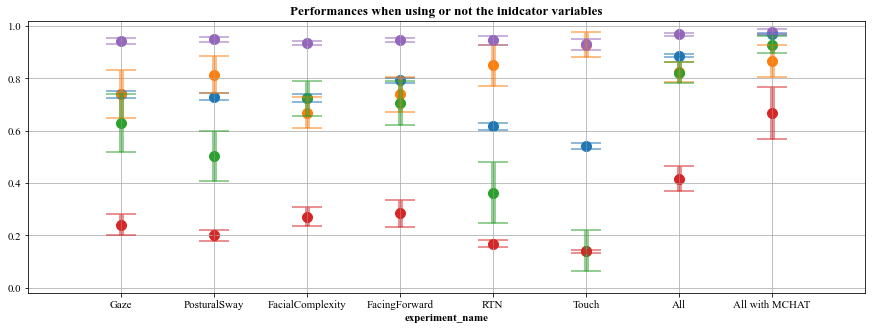

In [323]:
results = results_df_vertical[(results_df_vertical['experiment_name'].str.contains('Multimodal')) & (results_df_vertical['metric_name'].isin(metrics_to_plot))]
results['experiment_name'] = results['experiment_name'].apply(lambda x: x.replace('Multimodal ', ''))
results['experiment_name'] = results['experiment_name'].replace({name: name.replace('-', 'but\n') if '-' in name else 
                                                                 name.replace('but', 'but\n') if 'but' in name else 
                                                                 name.replace('but', 'but\n') for name in results['experiment_name'].unique()})
results['experiment_name'].unique()
results.reset_index(drop=True, inplace=True)
results['relative_score'] = np.nan

results['experiment_name'].unique()
for idx, row in results.iterrows():
    
    baseline_score = results.loc[(results['experiment_name']=='All') & (results['metric_name']==row['metric_name']), 'score'].mean()
    
    results.loc[idx, 'relative_score'] = (row['score']-baseline_score)#/baseline_score*100
order_multimodal = ['All', 'All - Gaze', 'All - RTN', 'All - PosturalSway', 'All - Touch', 'Gaze', 'RTN', 'PosturalSway', 'Touch']
order_multimodal = ['Gaze', 'PosturalSway', 'FacialComplexity', 'FacingForward', 'RTN', 'Touch', 'All', 'All but\n Gaze', 'All but\n PosturalSway', 'All but\n FacialComplexity', 'All but\n FacingForward', 'All but\n RTN', 'All but\n Touch', 'All with MCHAT']
order_multimodal = ['Gaze', 'PosturalSway', 'FacialComplexity', 'FacingForward', 'RTN', 'Touch', 'All', 'All with MCHAT']


condition = 'experiment_name'
plot_scatter_results(results[results['experiment_name'].isin(order_multimodal)], condition, xtickslabels=None, order=order_multimodal, rotate=False, savefig='features_comparison')
    

In [306]:
pd.set_option('display.max_rows', 1000)

In [309]:
results.groupby(['experiment_name', 'metric_name']).describe()['score']

count      mean       std       min       25%       50%       75%       max
experiment_name            metric_name                                                                             
All                        AUROC         50.0  0.887020  0.006570  0.875000  0.882250  0.888500  0.890750  0.904000
                           NPV           50.0  0.969520  0.005273  0.958000  0.966250  0.970500  0.973000  0.981000
                           NPV Corr      50.0  0.995128  0.000867  0.993255  0.994596  0.995278  0.995774  0.997015
                           PPV           50.0  0.417240  0.048324  0.312000  0.384250  0.415000  0.444000  0.549000
                           PPV-Corr      50.0  0.101420  0.019019  0.066000  0.088250  0.099500  0.110750  0.159000
                           Sensitivity   50.0  0.825760  0.037318  0.735000  0.796000  0.837000  0.857000  0.898000
                           Specificity   50.0  0.822940  0.039767  0.704000  0.796000  0.823000  0.847250  0.909000
All but\n FacialComplexity AUROC         50.0  0.873020  0.009063  0.847000  0.868000  0.873000  0.876750  0.900000
                           NPV           50.0  0.964200  0.008483  0.943000  0.958250  0.962500  0.970750  0.980000
                           NPV Corr      50.0  0.994240  0.001390  0.990746  0.993313  0.993940  0.995296  0.996859
                           PPV           50.0  0.397960  0.059892  0.304000  0.359250  0.396000  0.419500  0.600000
                           PPV-Corr      50.0  0.095020  0.023504  0.064000  0.080000  0.092500  0.100750  0.189000
                           Sensitivity   50.0  0.795220  0.060569  0.633000  0.755000  0.786000  0.837000  0.898000
                           Specificity   50.0  0.811500  0.054945  0.695000  0.778750  0.817000  0.845000  0.927000
All but\n FacingForward    AUROC         50.0  0.876560  0.009125  0.843000  0.870250  0.878000  0.882000  0.894000
                           NPV           50.0  0.960280  0.005810  0.942000  0.957000  0.960500  0.963750  0.973000
                           NPV Corr      50.0  0.993592  0.000986  0.990430  0.993063  0.993639  0.994181  0.995625
                           PPV           50.0  0.421460  0.052759  0.344000  0.384250  0.416500  0.446750  0.579000
                           PPV-Corr      50.0  0.103300  0.021458  0.076000  0.088250  0.099500  0.111750  0.176000
                           Sensitivity   50.0  0.766620  0.044990  0.633000  0.755000  0.776000  0.796000  0.857000
                           Specificity   50.0  0.837500  0.039281  0.756000  0.811750  0.836500  0.860000  0.927000
All but\n Gaze             AUROC         50.0  0.870540  0.008150  0.847000  0.866000  0.870000  0.876000  0.886000
                           NPV           50.0  0.963940  0.009505  0.950000  0.956000  0.962500  0.970750  0.987000
                           NPV Corr      50.0  0.994202  0.001566  0.991902  0.992862  0.994025  0.995385  0.997982
                           PPV           50.0  0.376580  0.051312  0.287000  0.336000  0.375500  0.419000  0.473000
                           PPV-Corr      50.0  0.087100  0.017446  0.059000  0.073000  0.085500  0.101000  0.123000
                           Sensitivity   50.0  0.797180  0.066353  0.694000  0.735000  0.796000  0.852000  0.939000
                           Specificity   50.0  0.793860  0.060889  0.659000  0.749250  0.803500  0.848000  0.881000
All but\n PosturalSway     AUROC         50.0  0.891040  0.007412  0.874000  0.887000  0.891000  0.895750  0.907000
                           NPV           50.0  0.969660  0.004881  0.960000  0.966000  0.970000  0.973750  0.979000
                           NPV Corr      50.0  0.995148  0.000790  0.993533  0.994591  0.995159  0.995825  0.996615
                           PPV           50.0  0.461600  0.044515  0.366000  0.426750  0.475000  0.492500  0.544000
                           PPV-Corr      50.0  0.118840  0.018661  0.082000  0.103500  0.123500 

**Creation of the final model to perfrom the subgroup analysis**

In [324]:
df_subgroup_analysis = deepcopy(df[df['experiment_name']=='Multimodal All'])

In [325]:
use_weight = True
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df_autism =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df_autism, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=False,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='Final', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Multimodal All',
                  verbosity=1, 
                  save_experiment=False)

random_state=np.random.randint(1000)
#exp.fit_predict(num_cv=10, sample_weight=weighted_confidence_score, random_state=random_state)
#exp.predictions_df['sample_weight'] = weighted_confidence_score
#exp.plot()

**Initialize the result dataframe**

In [327]:
results = None
for i, row in df_subgroup_analysis.iterrows():
    
    y_true = row['y_true'][0]
    y_pred = row['y_pred'][0]
    optimal_threshold = row['optimal_threshold']
    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(row['y_true'])/row['num_samples'], np.sum(row['y_true'][0] == 0), np.sum(row['y_true'][0] == 1))

    
    res = compute_results(y_true, y_pred, optimal_threshold, name="All", title=title)
    if results is not None:
        results = results.append(res)
    else:
        results = res
    

In [315]:
columns_of_interest = ['experiment_name', 'approach', 'y_true', 'y_pred', 'optimal_threshold', 'AUROC', 'AUC-PR', 'AUC-PR-Gain', 'AUC-PR-Corrected', 'AUC-PR-Gain-Corrected', 'F1', 'F1 score Corrected', 'F2', 'F2 score Corrected', 'Accuracy', 'MCC', 'Sensitivity', 'Specificity', 'Precision', 'PPV', 'PPV-Corr', 'NPV', 'FNR', 'FDR', 'FOR', 'TP', 'TN', 'FP', 'FN']


**Ablation per sex**

In [328]:


for sex, sex_encoding in zip(['Male', 'Female'], [0, 1]):#[0,1]):
    
    for i, row in df_subgroup_analysis.iterrows():
        
        index_subgroup = np.array(exp.dataset.df[exp.dataset.df['sex']==sex_encoding].index)
        
        y_true = row['y_true'][0][index_subgroup]
        y_pred = row['y_pred'][0][index_subgroup]
        optimal_threshold = row['optimal_threshold']
        title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))


        res = compute_results(y_true, y_pred, optimal_threshold, name=sex, title=title)
        results = results.append(res)

**Ablation per race and ethnicity**

In [329]:

exp.dataset.df.loc[exp.dataset.df['race'].isnull(), 'race'] = -1
for race, race_encoding in zip(['White/Caucasian', 'Black/African American', 'Other'], [0,1, 2]):
    
    for i, row in df_subgroup_analysis.iterrows():
        
        index_subgroup = np.array(exp.dataset.df[exp.dataset.df['race']==race_encoding].index)
        
        y_true = row['y_true'][0][index_subgroup]
        y_pred = row['y_pred'][0][index_subgroup]
        optimal_threshold = row['optimal_threshold']
        title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))


        res = compute_results(y_true, y_pred, optimal_threshold, name=race, title=title)
        results = results.append(res)
        
    
        
for ethnicity, ethnicity_encoding in zip(['Not Hispanic/Latino', 'Hispanic/Latino'], [0,1]):
    
    
    for i, row in df_subgroup_analysis.iterrows():
        
        index_subgroup = np.array(exp.dataset.df[exp.dataset.df['ethnicity']==ethnicity_encoding].index)
        
        y_true = row['y_true'][0][index_subgroup]
        y_pred = row['y_pred'][0][index_subgroup]
        optimal_threshold = row['optimal_threshold']
        title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))


        res = compute_results(y_true, y_pred, optimal_threshold, name=ethnicity, title=title)
        results = results.append(res)    
    

**Ablation per age**

In [330]:
age_bins = [[17, 21], [21, 25], [25, 29], [29, 36], [36, 50]]
age_bins = [[17, 18.5], [18.5, 24], [24, 37]]


exp.dataset.df['age_bin'] = np.nan
for (low_age, high_age) in age_bins:
    
    age_name = 'Age (Months)\n{}-{}'.format(low_age, high_age)
    exp.dataset.df.loc[(exp.dataset.df['age'] >= low_age) & (exp.dataset.df['age'] < high_age), 'age_bin'] = age_name
    
    
for age_bin in exp.dataset.df['age_bin'].unique():
    
    for i, row in df_subgroup_analysis.iterrows():
        
        index_subgroup = np.array(exp.dataset.df[exp.dataset.df['age_bin']==age_bin].index)
        
        y_true = row['y_true'][0][index_subgroup]
        y_pred = row['y_pred'][0][index_subgroup]
        optimal_threshold = row['optimal_threshold']
        title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))


        res = compute_results(y_true, y_pred, optimal_threshold, name=str(age_bin), title=title)
        results = results.append(res)    
    

**Ablation per Mchat results**

In [331]:

for i, row in df_subgroup_analysis.iterrows():

    index_subgroup = np.array(exp.dataset.df[exp.dataset.df['mchat_final'].isnull()].index)

    y_true = row['y_true'][0][index_subgroup]
    y_pred = row['y_pred'][0][index_subgroup]
    optimal_threshold = row['optimal_threshold']
    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))

    res = compute_results(y_true, y_pred, optimal_threshold, name='No MCHAT', title=title)
    results = results.append(res)    

for i, row in df_subgroup_analysis.iterrows():

    index_subgroup = np.array(exp.dataset.df[exp.dataset.df['mchat_result'] == 0].index)

    y_true = row['y_true'][0][index_subgroup]
    y_pred = row['y_pred'][0][index_subgroup]
    optimal_threshold = row['optimal_threshold']
    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))

    res = compute_results(y_true, y_pred, optimal_threshold, name='MCHAT Negative',title=title)
    results = results.append(res)    


for i, row in df_subgroup_analysis.iterrows():

    index_subgroup = np.array(exp.dataset.df[exp.dataset.df['mchat_result'] == 1].index)

    y_true = row['y_true'][0][index_subgroup]
    y_pred = row['y_pred'][0][index_subgroup]
    optimal_threshold = row['optimal_threshold']
    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))

    res = compute_results(y_true, y_pred, optimal_threshold, name='MCHAT Positive', title=title)
    results = results.append(res)    


**Ablation per missing data patterns (old version based on exp.)**

In [148]:
grouped_missing_features = {#'Floating Bubbles': ['FB_postural_sway', 'FB_postural_sway_derivative'],
                             #'DogInGrassC': ['DIGC_postural_sway', 'DIGC_postural_sway_derivative'],
                             #'DogInGrassRRL': ['DIGRRL_postural_sway', 'DIGRRL_postural_sway_derivative'],
                             #'SpinningTop': ['ST_postural_sway', 'ST_postural_sway_derivative'],
                            
                             #'PlayingWithBlocks': ['PWB_postural_sway', 'PWB_postural_sway_derivative'],
                             #'FunAtThePark': ['FP_postural_sway', 'FP_postural_sway_derivative', 
                                              #'FP_gaze_speech_correlation', 'FP_gaze_silhouette_score'], 

#                            'MechanicalPuppy': ['MP_postural_sway', 'MP_postural_sway_derivative'],
#                             'BlowingBubbles': ['BB_gaze_percent_right', 'BB_gaze_percent_right',
                                   #             'BB_postural_sway', 'BB_postural_sway_derivative'],
                            
                             'Social gaze': ['mean_gaze_percent_right'],
                             'Silhouette Score': ['gaze_silhouette_score'],    
                             'Gaze percent Right': ['mean_gaze_percent_right'],
                            
                            'S PosturalSway':['S_postural_sway'], 
                            'NS PosturalSway':['NS_postural_sway'], 
                            
                            'S PosturalSwayDerivative':['S_postural_sway_derivative'], 
                            'NS PosturalSwayDerivative':['NS_postural_sway_derivative'],                             
                            
                            # 'RhymesAndToys': ['RT_postural_sway', 'RT_postural_sway_derivative'],
                            # 'MakeMeLaugh': ['MML_postural_sway', 'MML_postural_sway_derivative'],
                            'S_postural_sway_complexity': ['S_postural_sway_complexity'],
                             'NS_postural_sway_complexity': ['NS_postural_sway_complexity'],
                            'S_facing_forward': [ 'S_facing_forward'],
                            'NS_facing_forward': [ 'NS_facing_forward'],
                            'S_eyebrows_complexity': [ 'S_eyebrows_complexity'],
                            'NS_eyebrows_complexity': [ 'NS_eyebrows_complexity'],
                            'S_mouth_complexity': [ 'S_mouth_complexity'],
                            'NS_mouth_complexity': [ 'NS_mouth_complexity'],

                            
                             'RTN': ['proportion_of_name_call_responses'],
                             'RTNDelay': ['average_response_to_name_delay'],
                             'Game administration': ['number_of_touches', 'number_of_target'],
                             'NoTouches': ['average_error','std_error']}
                            
                             #'Game administration': ['number_of_touches', 'number_of_target'],#, 'exploratory_percentage'],
                             #'NoTouches': ['average_length','std_length', 'pop_rate','average_touch_duration',
                             #                     'std_touch_duration', 'average_accuracy_variation', 'accuracy_consistency'],
                             #'TimeSpent': ['average_time_spent', 'std_time_spent']}
                    


In [333]:
X  = pd.DataFrame(exp.dataset._X_train, columns=exp.features_name)
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
exp.dataset.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

Social gaze 5.14% with 5.00 NT and 8.00 autistic
Silhouette Score 4.93% with 5.00 NT and 6.00 autistic
Gaze percent Right 5.14% with 5.00 NT and 8.00 autistic
S PosturalSway 4.71% with 5.00 NT and 6.00 autistic
NS PosturalSway 0.00% with 0.00 NT and 0.00 autistic
S PosturalSwayDerivative 4.71% with 5.00 NT and 6.00 autistic
NS PosturalSwayDerivative 0.00% with 0.00 NT and 0.00 autistic
S_postural_sway_complexity 4.71% with 5.00 NT and 6.00 autistic
NS_postural_sway_complexity 0.00% with 0.00 NT and 0.00 autistic
S_facing_forward 4.50% with 4.00 NT and 6.00 autistic
NS_facing_forward 0.00% with 0.00 NT and 0.00 autistic
S_eyebrows_complexity 4.71% with 5.00 NT and 6.00 autistic
NS_eyebrows_complexity 0.00% with 0.00 NT and 0.00 autistic
S_mouth_complexity 4.71% with 5.00 NT and 6.00 autistic
NS_mouth_complexity 0.00% with 0.00 NT and 0.00 autistic
RTN 0.86% with 1.00 NT and 2.00 autistic
RTNDelay 25.48% with 25.00 NT and 28.00 autistic
Game administration 28.27% with 29.00 NT and 24.00 

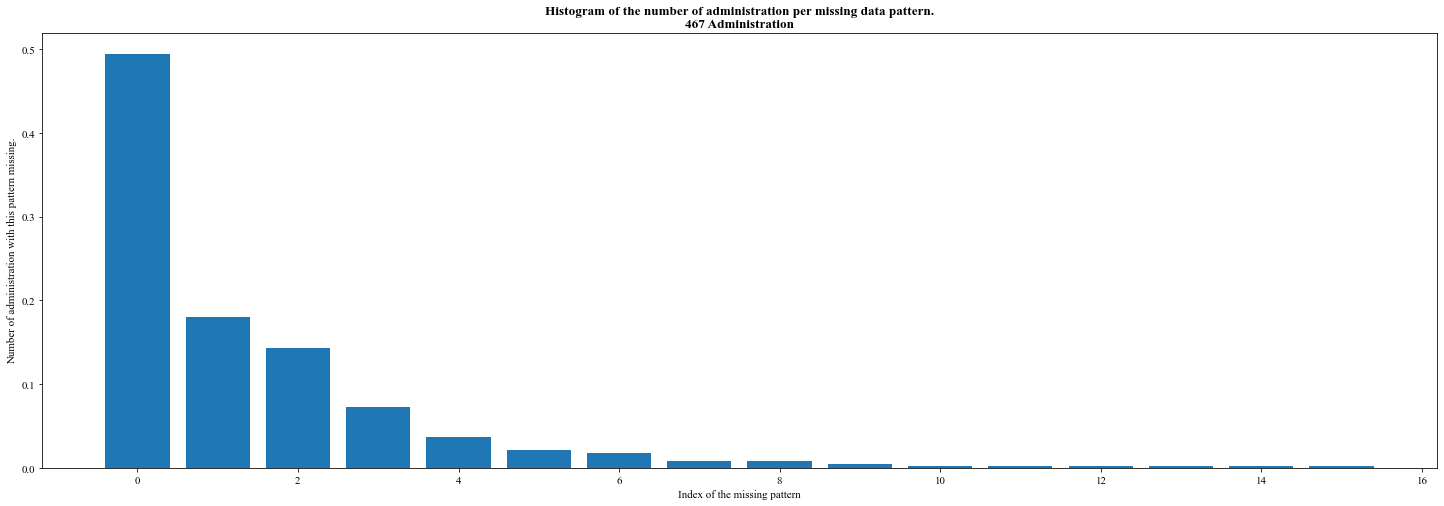

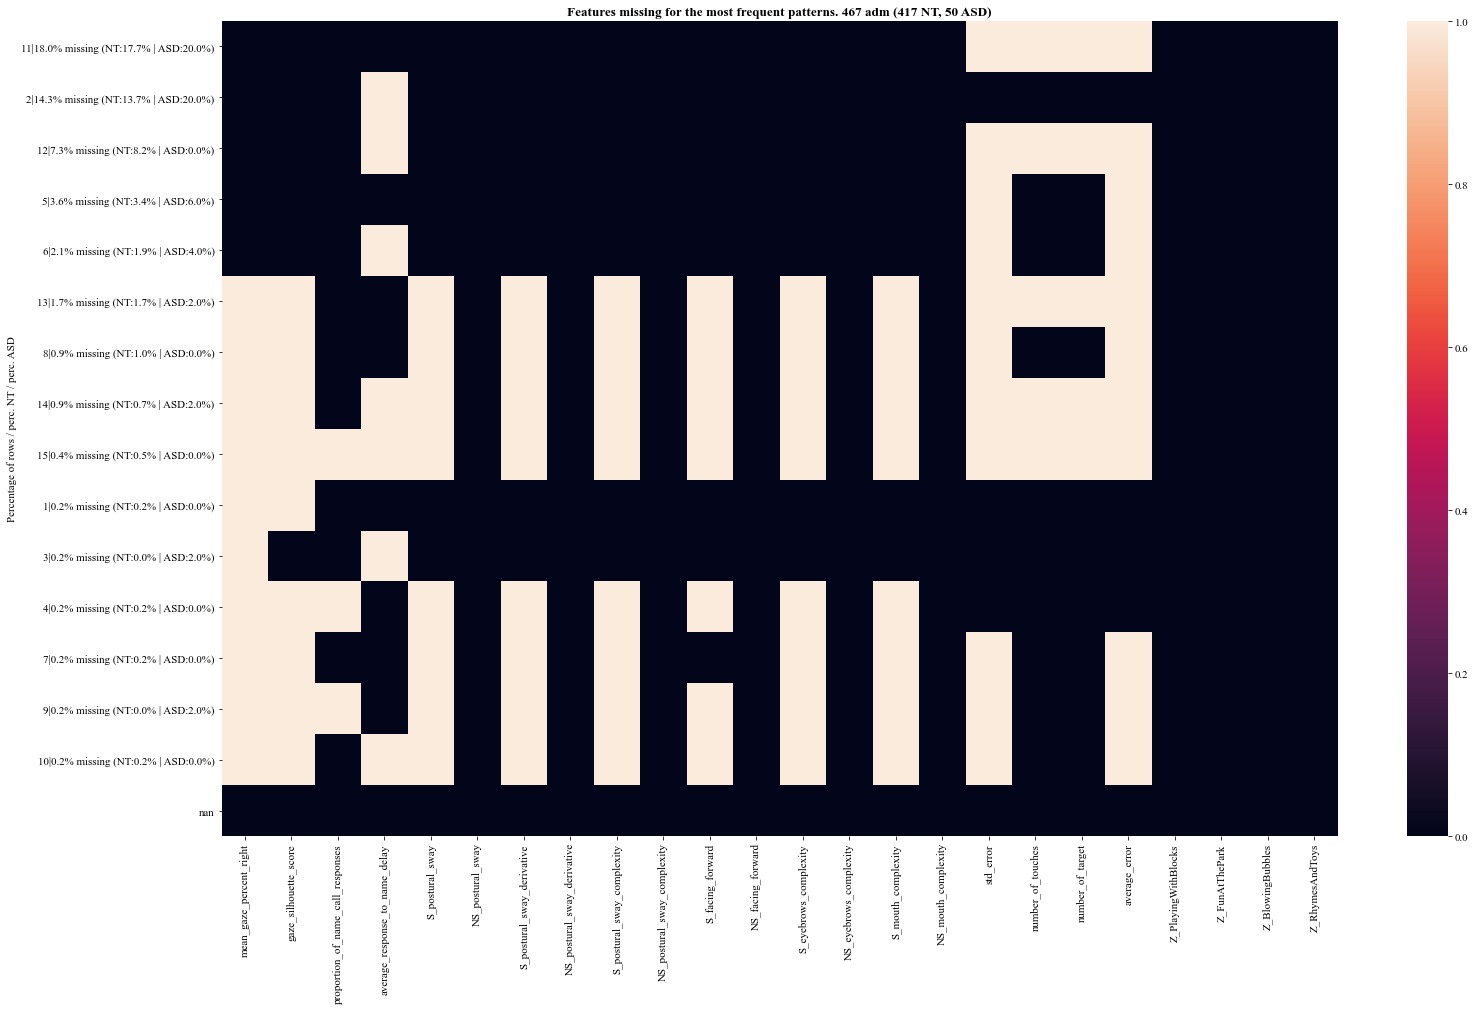

In [103]:
dataframe_missing = deepcopy(exp.predictions_df)
for name_missing, feature_missing  in grouped_missing_features.items():
    
    print("{} {:.2f}% with {:.2f} NT and {:.2f} autistic".format(name_missing, 100*len(having_missing(dataframe_missing, feature_missing, contrary=False))/len(dataframe_missing), 
                                                                 100*round(len(having_missing(select(dataframe_missing, 'y_true', 0), feature_missing, contrary=False))/len(select(dataframe_missing, 'y_true', 0)), 2), 
                                                                 100*round(len(having_missing(select(dataframe_missing, 'y_true', 1), feature_missing, contrary=False))/len(select(dataframe_missing, 'y_true', 1)), 2)))
    


plt.figure(figsize=(25, 8))
plt.bar(x=np.arange((len(dataframe_missing["mdp"].value_counts().index))), height=dataframe_missing["mdp"].value_counts(normalize=True).to_numpy())
plt.title("Histogram of the number of administration per missing data pattern.\n{} Administration".format(len(dataframe_missing)), weight='bold');plt.xlabel("Index of the missing pattern"); plt.ylabel("Number of administration with this pattern missing.")
print("Number of missing patterns: {}".format(n_pat))
matrix = pd.DataFrame(
            data=np.zeros(shape=(len(dataframe_missing["mdp"].value_counts().index), len(exp.features_name)+1)),
            columns=exp.features_name+['Percentage of rows'],
            index=dataframe_missing["mdp"].unique(),
        ).sort_index()

for pattern in sorted(dataframe_missing["mdp"].unique())[1:]:
    d = dataframe_missing.loc[dataframe_missing['mdp']==pattern, ['y_true'] + exp.features_name]
    missing_columns = list(d.columns[d.isnull().any()])
    matrix.loc[pattern, missing_columns] = 1
    matrix.loc[pattern, 'Percentage of rows'] = np.round(len(d)/len(dataframe)*100,2)
    #matrix.loc[pattern, 'Percentage of rows (autism)'] = np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,2)
    #matrix.loc[pattern, 'Percentage of rows (NT)'] = np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,2)
    matrix.loc[pattern, 'Percentage of rows / perc. NT / perc. ASD'] = "{}|{}% missing (NT:{}% | ASD:{}%)".format(pattern,np.round(len(d)/len(dataframe)*100,1), np.round(len(d[d['y_true']==0])/len(dataframe_missing[dataframe_missing['y_true']==0])*100,1), np.round(len(d[d['y_true']==1])/len(dataframe_missing[dataframe_missing['y_true']==1])*100,1))

matrix.sort_values('Percentage of rows', ascending=False, inplace=True)
plt.figure(figsize=(25, 15))
sns.heatmap(matrix.set_index('Percentage of rows / perc. NT / perc. ASD').loc[:, exp.features_name].astype(int))
plt.title("Features missing for the most frequent patterns. {} adm ({} NT, {} ASD)".format(len(dataframe_missing), len(dataframe_missing[dataframe_missing['y_true']==0]), len(data.df[dataframe_missing['y_true']==1])), weight='bold')


from metrics import f1score, average_precision, bestf1score, calc_auprg, create_prg_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, plot_roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
import prg

dataframe = deepcopy(exp.predictions_df)
mapping_name = {0: "Complete", 
                11: "Only game missing", 
                12: "Game and Delay missing", 
                2: "Only delay missing"}
               # 11: "Game & Delay missing"}

#for mdp_index in mapping_name.keys():
#    d = dataframe[dataframe['mdp']==mdp_index]

for mdp_index in mapping_name.keys():
    d = dataframe_missing[dataframe_missing['mdp']==mdp_index]

    
    title = mapping_name[mdp_index]
    title+= " {:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe_missing), len(d[d['y_true']==0]), len(d[d['y_true']==1]))
    
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    try: 
        res = compute_results(y_true, y_pred, exp.optimal_threshold, name=mapping_name[mdp_index], title=title)
        results = results.append(res)
    except ValueError:
        pass
    
    

**Based on missing variables**

In [334]:
X  = pd.DataFrame(exp.dataset._X_train, columns=exp.features_name)
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
exp.dataset.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

grouped_missing_features = {k: [v] for k, v in feature_name_mapping.items()}

for mdp in sorted(exp.dataset.df["mdp"].unique()):
    
    d = deepcopy(exp.dataset.df[exp.dataset.df["mdp"] == mdp])
    
    if len(d)/len(exp.dataset.df)*100 > 5:
        print(mdp, "{:.2f} %".format(len(d)/len(exp.dataset.df)*100))
        print("\n".join(d[exp.features_name].columns[d[exp.features_name].isna().any()].tolist()))
mapping_name = {0: "Complete", 
                10: "Only game missing", 
                12: "Game and Delay missing", 
                3: "Only delay missing"}
               # 11: "Game & Delay missing"}

#for mdp_index in mapping_name.keys():
#    d = dataframe[dataframe['mdp']==mdp_index]

for mdp_index in mapping_name.keys():
    for i, row in df_subgroup_analysis.iterrows():

        index_subgroup = np.array(exp.dataset.df[exp.dataset.df["mdp"] == mdp_index].index)

        y_true = row['y_true'][0][index_subgroup]
        y_pred = row['y_pred'][0][index_subgroup]
        optimal_threshold = row['optimal_threshold']
        title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))

        res = compute_results(y_true, y_pred, optimal_threshold, name= mapping_name[mdp_index],title=title)
        results = results.append(res)    



0 49.07 %

3 13.79 %
average_response_to_name_delay
10 19.36 %
pop_rate
std_error
average_length
average_force_applied
12 8.22 %
average_response_to_name_delay
pop_rate
std_error
average_length
average_force_applied


**Results for administrations having a compliance higher than .75 (old version)**

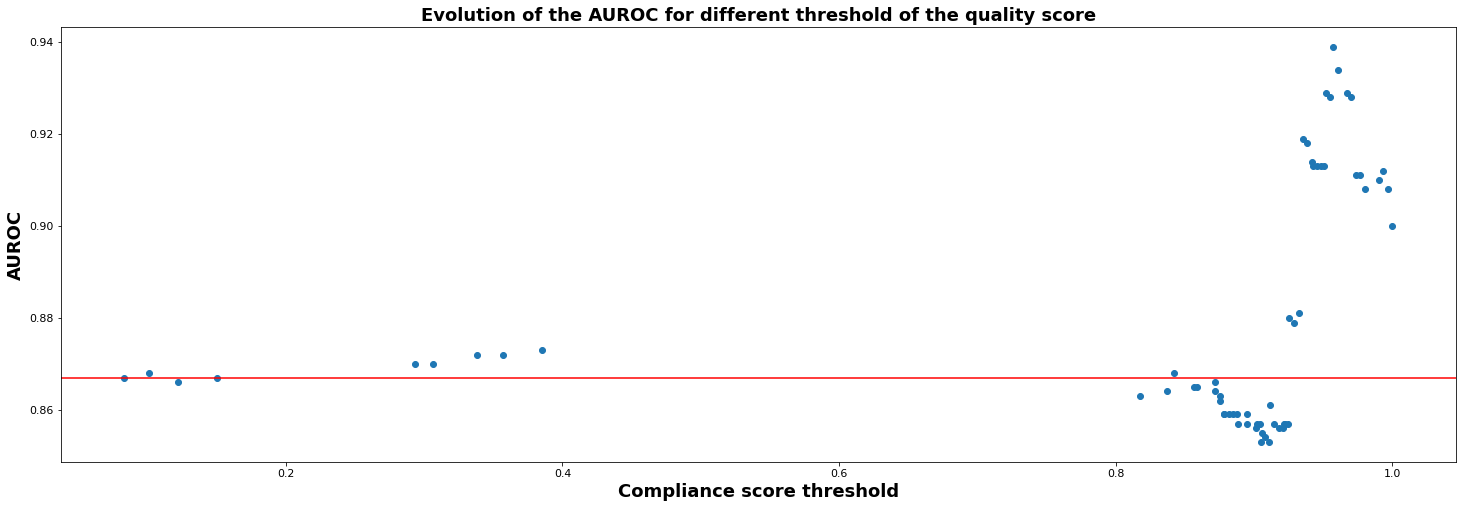

In [61]:
exp.sample_weight = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))
auroc = []
_, _, threshold = roc_curve(exp.sample_weight.astype(int), exp.sample_weight)

for th in threshold[1:]:
    d=dataframe.iloc[np.argwhere(exp.sample_weight >=th).flatten()]

    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))

    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()

    res = compute_results(y_true, y_pred, exp.optimal_threshold, name='Complete\nAdministrations', title=title)
    res#ults = results.append(res)

    auroc.append(res['AUROC'].item())

fi(25, 8)
plt.title("Evolution of the AUROC for different threshold of the quality score", weight='bold', fontsize=18)
plt.ylabel("AUROC", weight='bold', fontsize=18)
plt.xlabel("Compliance score threshold", weight='bold', fontsize=18)
plt.axhline(auroc[-1], color='red', label='No threshold')

plt.scatter(threshold[1:], auroc)

In [ ]:
        
d=dataframe.iloc[np.argwhere(exp.sample_weight >=.75).flatten()]

title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(d)/len(dataframe), len(d[d['y_true']==0]), len(d[d['y_true']==1]))

y_true = d['y_true'].to_numpy()
y_pred = d['y_pred'].to_numpy()

res = compute_results(y_true, y_pred, exp.optimal_threshold, name='Conclusive\nAdministrations', title=title)
results = results.append(res)

**Results for administrations having a compliance higher than .75**

In [335]:
exp.sample_weight = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))
index_subgroup = np.array(np.argwhere(exp.sample_weight >=.75).flatten())

In [336]:
for i, row in df_subgroup_analysis.iterrows():

    index_subgroup = np.array(np.argwhere(exp.sample_weight >=.75).flatten())

    y_true = row['y_true'][0][index_subgroup]
    y_pred = row['y_pred'][0][index_subgroup]
    optimal_threshold = row['optimal_threshold']
    title = "{:.2f} % of the dataset ({} NT - {} autistic)".format(100*len(y_true)/row['num_samples'], np.sum(y_true == 0), np.sum(y_true== 1))

    res = compute_results(y_true, y_pred, optimal_threshold, name= 'Conclusive\nAdministrations',title=title)
    results = results.append(res)    




final_results## Analysis of the results

In [401]:
final_results.columns

Index(['subgroup', 'name', 'AUROC', 'AUC-PR', 'AUC-PR-Gain', 'AUC-PR-Corrected', 'AUC-PR-Gain-Corrected', 'F1 score (2 PPVxTPR/(PPV+TPR))', 'F1 score Corrected', 'F2', 'F2 Corrected', 'Accuracy', 'Matthews correlation coefficient (MCC)', 'Sensitivity', 'Specificity', 'Precision or positive predictive value (PPV)', 'PPV-Corr', 'Corrected NPV', 'Negative predictive value (NPV)', 'Miss rate or false negative rate (FNR)', 'False discovery rate (FDR=1-PPV)', 'False omission rate (FOR=1-NPV)', 'TP', 'TN', 'FP', 'FN', 'TN_normalized', 'TP_normalized', 'FP_normalized', 'FN_normalized', 'N', 'y_true', 'y_pred', 'Hanley_CI', 'NPV Corr', 'correction_factor', 'NPV-Corr', 'subgroup_name'], dtype='object')

In [402]:
results['correction_factor'] = results.apply(lambda x: (np.mean(x['y_true'])*(1-REFERENCE_IMBALANCE_RATIO))/(REFERENCE_IMBALANCE_RATIO*(1-np.mean(x['y_true']))), axis=1)
results['NPV-Corr'] = results.apply(lambda x: (x['correction_factor']*x['TN'])/(x['correction_factor']*x['TN']+x['FN']+1e-5), axis=1)

final_results = deepcopy(results)

final_results.reset_index(inplace=True)
final_results.rename(columns={'Sensitivity, recall, hit rate, or true positive rate (TPR)':'Sensitivity', 
                       'Specificity, selectivity or true negative rate (TNR)':'Specificity', 
                       'Corrected Precision or positive predictive value (PPV)':'PPV-Corr', 
                       'Precision or positive predictive value (PPV)': 'PPV', 
                              'Negative predictive value (NPV)': 'NPV'
                              
                       }, inplace=True)

final_results.rename(columns={'index': 'subgroup'}, inplace=True)
final_results['subgroup_name'] = final_results['subgroup'].apply(lambda x: x.split('\n')[0] if x.split('\n')[0]!='Age' else x.split('\n')[0] + '\n' + x.split('\n')[1])


results_vertical = pd.DataFrame(columns = ['subgroup', 'score', 'metric_name'])#, 'TP', 'TN', 'FP', 'FN', 'N'])

metrics_of_interest =['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'PPV-Corr', 'NPV', 'NPV-Corr']
metrics_to_plot = ['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'PPV-Corr', 'NPV', 'NPV-Corr']

for _, experiment_row in final_results.iterrows():
    
    pi = row['y_true'][0].mean()
    correction_factor = (pi*(1-REFERENCE_IMBALANCE_RATIO))/(REFERENCE_IMBALANCE_RATIO*(1-pi))

    
    for metric in metrics_of_interest:
        
        results_vertical = results_vertical.append(pd.DataFrame({'subgroup':experiment_row['subgroup'], 
                                                                       'score':experiment_row[metric], 
                                                                       'metric_name':metric,
                                                                       'TP':experiment_row['TP'], 
                                                                       'TN':experiment_row['TN'], 
                                                                       'FP':experiment_row['FP'], 
                                                                       'FN':experiment_row['FN'], 
                                                                       'N': experiment_row['N'], 
                                                                       'Hanley_CI': experiment_row['Hanley_CI'],
                                                                       'y_true': [experiment_row['y_true']],
                                                                       'y_pred': [experiment_row['y_pred']]
                                                                      }, index=[0]))
        
results_vertical.reset_index(drop=True, inplace=True)
results_vertical['subgroup_name'] = results_vertical['subgroup'].apply(lambda x: x.split('\n')[0] if x.split('\n')[0]!='Age' else x.split('\n')[0] + '\n' + x.split('\n')[1])
results_vertical['N'] = results_vertical['N'].astype(int)
results_vertical['subgroup_raw'] = results_vertical['subgroup'].apply(lambda x: "\n".join(x.split('\n')[:-1]))


In [404]:
results_vertical.groupby(['subgroup', 'metric_name']).describe()

score                                                                          TP                                                    TN                                                            FP                                                      FN                                                 N                                                Hanley_CI                                                                      
                                                 count      mean       std       min       25%       50%       75%       max count   mean       std   min    25%   50%   75%   max count    mean        std    min     25%    50%     75%    max count   mean        std   min    25%   50%    75%   max count  mean       std  min  25%  50%    75%   max count   mean  std    min    25%    50%    75%    max     count      mean       std       min       25%       50%       75%       max
subgroup                             metric_name                                                                                                                                                                                                                                                                                                                                                                                                                                               
Age (Months)\n17-18.5\n(N=164)       AUROC        50.0  0.949740  0.022056  0.860000  0.945500  0.954000  0.962000  0.970000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.0  126.00  130.0  136.00  143.0  50.0  28.34   6.781156  16.0  23.00  29.0  33.00  47.0  50.0  0.16  0.421852  0.0  0.0  0.0   0.00   2.0  50.0  164.0  0.0  164.0  164.0  164.0  164.0  164.0      50.0  0.024897  0.008394  0.016648  0.020053  0.023378  0.026835  0.058053
                                     NPV          50.0  0.998740  0.003343  0.984000  1.000000  1.000000  1.000000  1.000000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.0  126.00  130.0  136.00  143.0  50.0  28.34   6.781156  16.0  23.00  29.0  33.00  47.0  50.0  0.16  0.421852  0.0  0.0  0.0   0.00   2.0  50.0  164.0  0.0  164.0  164.0  164.0  164.0  164.0      50.0  0.024897  0.008394  0.016648  0.020053  0.023378  0.026835  0.058053
                                     NPV-Corr     50.0  0.999070  0.002480  0.987924  1.000000  1.000000  1.000000  1.000000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.0  126.00  130.0  136.00  143.0  50.0  28.34   6.781156  16.0  23.00  29.0  33.00  47.0  50.0  0.16  0.421852  0.0  0.0  0.0   0.00   2.0  50.0  164.0  0.0  164.0  164.0  164.0  164.0  164.0      50.0  0.024897  0.008394  0.016648  0.020053  0.023378  0.026835  0.058053
                                     PPV          50.0  0.152280  0.034938  0.073000  0.129000  0.147000  0.179000  0.238000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.0  126.00  130.0  136.00  143.0  50.0  28.34   6.781156  16.0  23.00  29.0  33.00  47.0  50.0  0.16  0.421852  0.0  0.0  0.0   0.00   2.0  50.0  164.0  0.0  164.0  164.0  164.0  164.0  164.0      50.0  0.024897  0.008394  0.016648  0.020053  0.023378  0.026835  0.058053
                                     PPV-Corr     50.0  0.117720  0.028095  0.055000  0.098750  0.113000  0.139000  0.188000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.0  126.00  130.0  136.00  143.0  50.0  28.34   6.781156  16.0  23.00  29.0  33.00  47.0  50.0  0.16  0.421852  0.0  0.0  0.0   0.00   2.0  50.0  164.0  0.0  164.0  164.0  164.0  164.0  164.0      50.0  0.024897  0.008394  0.016648  0.020053  0.023378  0.026835  0.058053
                                     Sensitivity  50.0  0.968000  0.084370  0.600000  1.000000  1.000000  1.000000  1.000000  50.0   4.84  0.421852   3.0   5.00   5.0   5.0   5.0  50.0  130.66   6.781156  112.

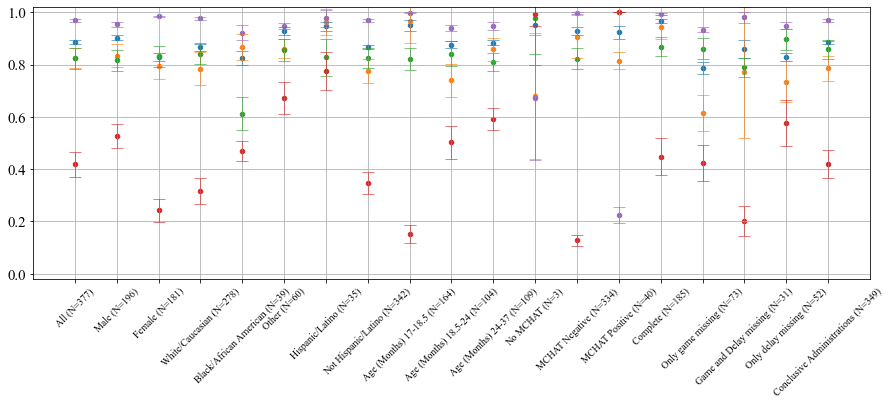

In [421]:
colors = plt.get_cmap('tab10')(np.arange(0,20))
rotate=1
savefig="Subgroups_analysis"
plt.rcParams["font.family"] = "Times New Roman"

condition = 'subgroup_raw'

order = ['All', 'Male', 'Female', 
         'White/Caucasian',
       'Black/African American', 'Other',
       'Hispanic/Latino',  'Not Hispanic/Latino',
         'Age (Months)\n17-18.5','Age (Months)\n18.5-24', 'Age (Months)\n24-37', 
        'No MCHAT', 'MCHAT Negative',
       'MCHAT Positive', 'Complete', 'Only game missing',
       'Game and Delay missing', 'Only delay missing',
       'Conclusive\nAdministrations']


xtickslabel = []
fig = plt.figure(figsize=(15, 5));ax = plt.gca()
# loop over the curves (i.e. the metrics to be plotted)
for j, metric_name in enumerate(['AUROC', 'Sensitivity', 'Specificity', 'PPV', 'NPV']):

    color = colors[j]
    # loop over the x ticks  (i.e. the condition that is varying)
    for i, condition_value in enumerate(order):

        plt.errorbar([i], 
                     results_vertical[(results_vertical['metric_name']==metric_name) &
                                (results_vertical[condition]==condition_value)]['score'].mean(),
                     yerr=results_vertical[(results_vertical['metric_name']==metric_name) &
                                (results_vertical[condition]==condition_value)]['score'].std(), 
                     fmt='',
                     ecolor=color,
                    # ecolor=color,
                     alpha=.6, 
                     capthick=1,
                     elinewidth=1,
                     capsize=6)
        plt.scatter([i], 
                     results_vertical[(results_vertical['metric_name']==metric_name) &
                                (results_vertical[condition]==condition_value)]['score'].mean(),
                     marker='o',
                     s=20,
                     label=metric_name if i==0 else None, color=color)
        if j ==0:
            xtickslabel.append(results_vertical[(results_vertical['metric_name']==metric_name) &
                                (results_vertical[condition]==condition_value)]['subgroup'].iloc[0].replace("\n", " "))

plt.grid(); #plt.title("Performances when using or not the inidcator variables", weight='bold')
#plt.ylabel(metric_name, weight='bold');
#plt.xlabel(condition, weight='bold');
plt.xlim([-1, len(results_vertical[condition].unique())]); plt.ylim([-0.02, 1.02])
plt.xticks(np.arange(len(results_vertical[condition].unique())), xtickslabel, rotation=45 if rotate else 0, fontsize=10);
plt.yticks( fontsize=15);

#plt.legend(prop={'size':20})
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'subgroup_results.png'), dpi=200, bbox_inches = 'tight')

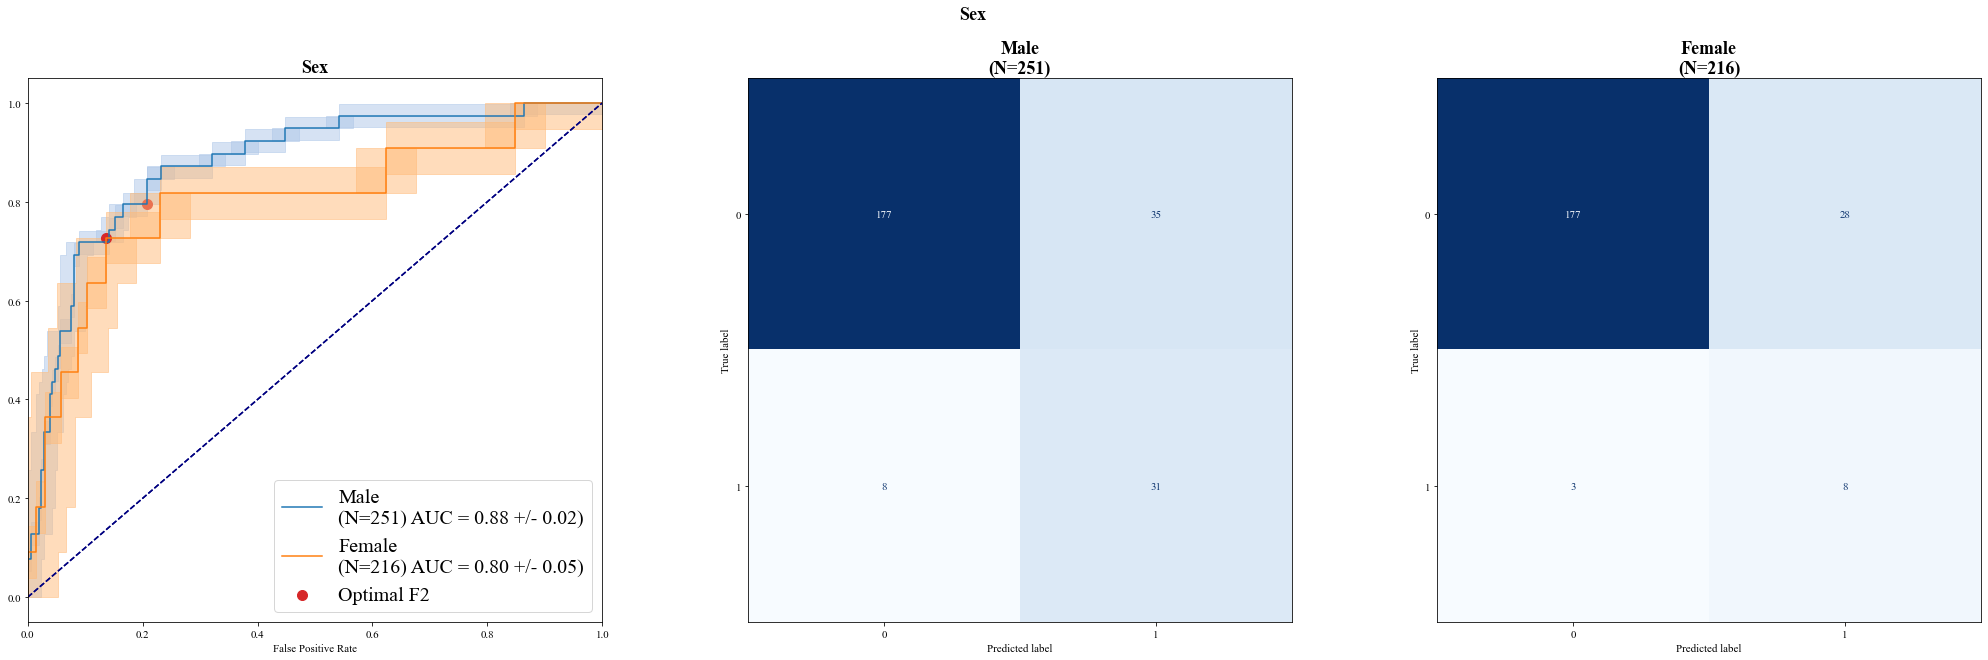

In [132]:
results_vertical['subgroup_raw'] = results_vertical['subgroup'].apply(lambda x: "\n".join(x.split('\n')[:-1]))

condition = 'subgroup_name'
colors = plt.get_cmap('tab20')(np.arange(0,20))

for comparisons_name, comparisons in zip(['Sex'],
                                         
                                         [['Male', 'Female']] ):
    
    d = results_vertical[results_vertical['subgroup_raw'].isin(comparisons)]
        
    fig, axes = plt.subplots(1, len(comparisons)+1, figsize=(35, 10))
    fig.suptitle(comparisons_name, weight='bold', fontsize=18)
    for i, comp in enumerate(comparisons):
        row = d[d['subgroup_raw'] == comp].iloc[0]
        
        
        # ROC CURVE
        y_true = row['y_true']
        y_pred = row['y_pred']


        fpr, tpr, thresholds = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
        hanley_ci = compute_SD(roc_auc, np.sum(y_true==0), np.sum(y_true==1))

        axes[0].plot(fpr, tpr, '-', lw=1.5, label='{} AUC = {:.2f} +/- {:.2f})'.format(row['subgroup'], roc_auc, hanley_ci))
        axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
        axes[0].set_xlim([0.0, 1.0]); axes[0].set_ylim([0.0, 1.05]); axes[0].grid()
        axes[0].set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
        
        tprs_upper = np.minimum(tpr + hanley_ci, 1);tprs_lower = np.maximum(tpr - hanley_ci, 0)
        axes[0].fill_between(fpr, tprs_lower, tprs_upper, color=colors[2*i + 1], alpha=.5)
        
        fpr_upper = np.minimum(fpr + hanley_ci, 1);fpr_lower = np.maximum(fpr - hanley_ci, 0)
        axes[0].fill_betweenx(tpr, fpr_lower, fpr_upper, color=colors[2*i + 1], alpha=.5)
        
        idx_threshold = np.argmin(np.abs(thresholds - exp.optimal_threshold))
        axes[0].scatter(fpr[idx_threshold], tpr[idx_threshold], color='tab:red', s=100, label="Optimal F2" if i==len(comparisons)-1 else None)
        
        axes[0].legend(loc='lower right', prop={'size':20})
        axes[0].set_title(comparisons_name, weight='bold', fontsize=18)
        
        
        # COnfusion matrix
        cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
        axes[i+1].set_title("{}".format(row['subgroup']), weight='bold', fontsize=18)

In [426]:
results

,name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Corrected NPV,Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN,TN_normalized,TP_normalized,FP_normalized,FN_normalized,N,y_true,y_pred,Hanley_CI,NPV Corr,correction_factor,NPV-Corr
All\n(N=377),All\n(N=377),0.889,0.641,0.947,0.346,0.992,0.554,0.177,0.695,0.336,0.825,0.504,0.837,0.823,0.414,0.099,0.995,0.971,0.163,0.586,0.029,41,270,58,8,71.618037,10.875332,15.384615,2.122016,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0017046883, 0.9521939754, 0.0036536532, 0.0...",0.018586,0.995409,6.423780,0.995409
All\n(N=377),All\n(N=377),0.896,0.660,0.951,0.361,0.992,0.574,0.197,0.689,0.359,0.846,0.518,0.796,0.854,0.448,0.112,0.994,0.966,0.204,0.552,0.034,39,280,48,10,74.270557,10.344828,12.732095,2.652520,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0021989483, 0.9485379457, 0.0043906164, 0.0...",0.017774,0.994471,6.423780,0.994471
All\n(N=377),All\n(N=377),0.882,0.610,0.931,0.275,0.983,0.585,0.209,0.686,0.372,0.857,0.528,0.776,0.869,0.469,0.121,0.994,0.963,0.224,0.531,0.037,38,285,43,11,75.596817,10.079576,11.405836,2.917772,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0018336095, 0.8657569289, 0.0019707941, 0.0...",0.019381,0.994028,6.423780,0.994028
All\n(N=377),All\n(N=377),0.891,0.637,0.944,0.334,0.991,0.650,0.266,0.730,0.443,0.889,0.601,0.796,0.902,0.549,0.159,0.995,0.967,0.204,0.451,0.033,39,296,32,10,78.514589,10.344828,8.488064,2.652520,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0023535809, 0.9542284608, 0.0040082941, 0.0...",0.018355,0.994768,6.423780,0.994768
All\n(N=377),All\n(N=377),0.879,0.645,0.954,0.384,0.993,0.523,0.163,0.659,0.311,0.812,0.465,0.796,0.814,0.390,0.091,0.994,0.964,0.204,0.610,0.036,39,267,61,10,70.822281,10.344828,16.180371,2.652520,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0009169535, 0.9830521345, 0.0008124289, 0.0...",0.019718,0.994203,6.423780,0.994203
All\n(N=377),All\n(N=377),0.890,0.615,0.932,0.261,0.970,0.611,0.223,0.719,0.395,0.865,0.561,0.816,0.872,0.488,0.129,0.995,0.969,0.184,0.512,0.031,40,286,42,9,75.862069,10.610080,11.140584,2.387268,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0119167957, 0.8972500563, 0.0018976072, 0.0...",0.018471,0.995125,6.423780,0.995125
All\n(N=377),All\n(N=377),0.876,0.617,0.932,0.324,0.989,0.509,0.148,0.673,0.294,0.785,0.460,0.857,0.774,0.362,0.081,0.996,0.973,0.143,0.638,0.027,42,254,74,7,67.374005,11.140584,19.628647,1.856764,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0022634163, 0.8685352802, 0.0029495852, 0.0...",0.020051,0.995728,6.423780,0.995728
All\n(N=377),All\n(N=377),0.890,0.622,0.930,0.299,0.989,0.549,0.172,0.700,0.330,0.817,0.503,0.857,0.811,0.404,0.095,0.996,0.974,0.143,0.596,0.026,42,266,62,7,70.557029,11.140584,16.445623,1.856764,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0021505952, 0.8921897411, 0.001843341, 0.00...",0.018471,0.995920,6.423780,0.995920
All\n(N=377),All\n(N=377),0.879,0.563,0.918,0.204,0.907,0.563,0.186,0.692,0.347,0.836,0.511,0.816,0.838,0.430,0.105,0.995,0.968,0.184,0.570,0.032,40,275,53,9,72.944297,10.610080,14.058355,2.387268,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0004085684, 0.9602319002, 0.0013356908, 0.0...",0.019718,0.994931,6.423780,0.994931
All\n(N=377),All\n(N=377),0.888,0.644,0.949,0.357,0.992,0.595,0.214,0.701,0.381,0.859,0.542,0.796,0.869,0.476,0.124,0.995,0.966,0.204,0.524,0.034,39,285,43,10,75.596817,10.344828,11.405836,2.652520,377,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,

KeyError: 'threshold'

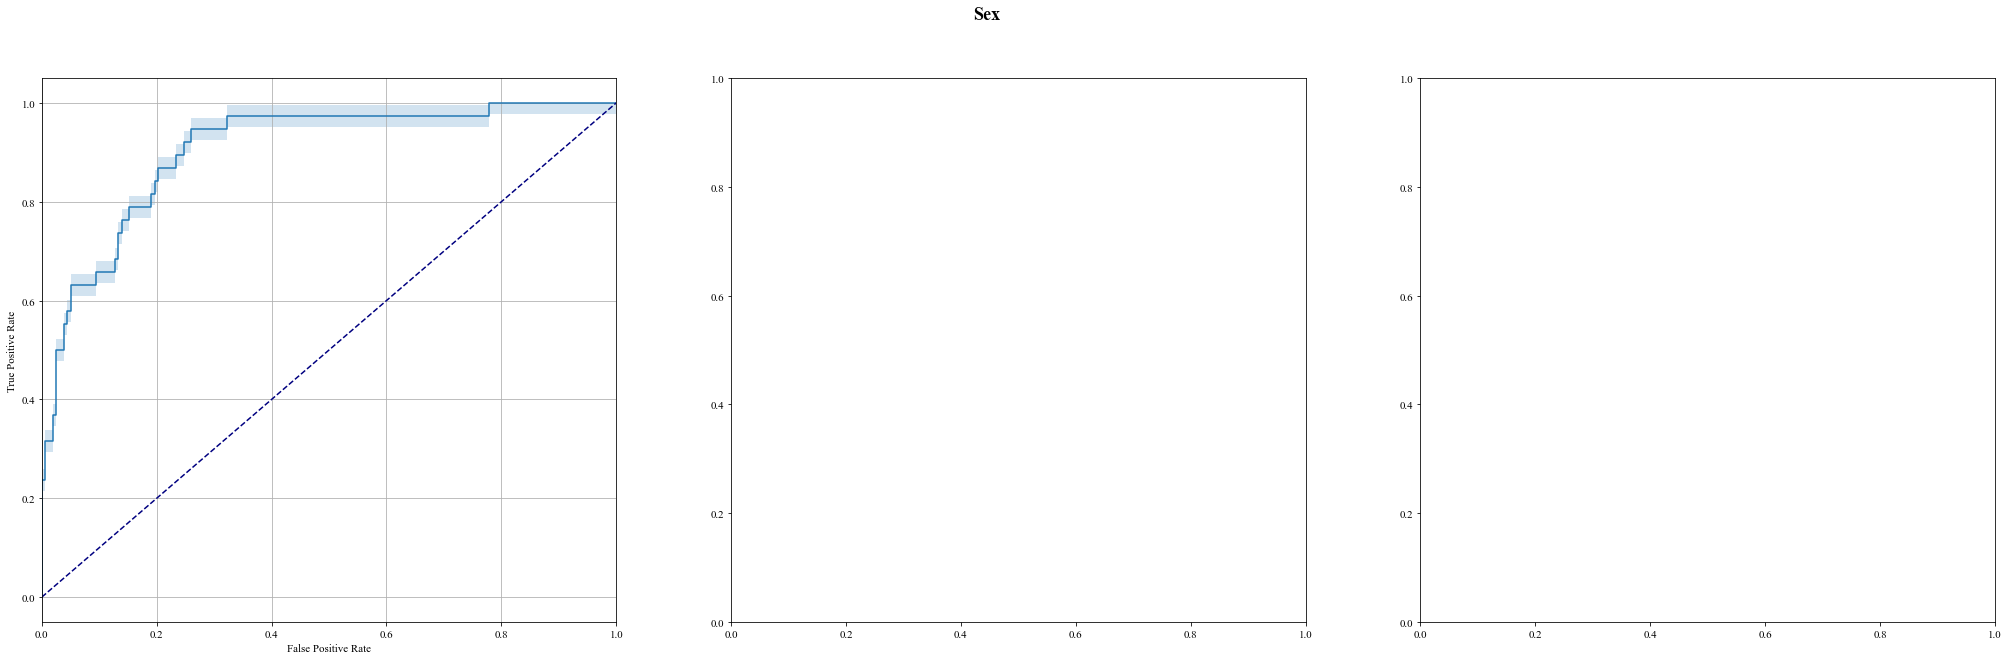

In [424]:
results_vertical['subgroup_raw'] = results_vertical['subgroup'].apply(lambda x: "\n".join(x.split('\n')[:-1]))

condition = 'subgroup_name'
for comparisons_name, comparisons in zip(['Sex', 'Race', 'Ethnicity', 'Age', 'MCHAT', 'Missing Data'],
                                         
                                         [['Male', 'Female'],
                                          ['White/Caucasian','Black/African American', 'Other'],
                                         ['Not Hispanic/Latino','Hispanic/Latino'], 
                                          ['Age (Months)\n17-21', 'Age (Months)\n21-25', 'Age (Months)\n25-50'],
                                          ['No MCHAT','MCHAT Negative', 'MCHAT Positive'],
                                         ['Complete', 'Only game missing','Only delay missing']] ):
    
    d = results_vertical[results_vertical['subgroup_raw'].isin(comparisons)]
        
    fig, axes = plt.subplots(1, len(comparisons)+1, figsize=(35, 10))
    fig.suptitle(comparisons_name, weight='bold', fontsize=18)
    for i, comp in enumerate(comparisons):
        row = d[d['subgroup_raw'] == comp].iloc[0]
        
        
        # ROC CURVE
        y_true = row['y_true']
        y_pred = row['y_pred']


        fpr, tpr, thresholds = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
        hanley_ci = compute_SD(roc_auc, np.sum(y_true==0), np.sum(y_true==1))

        axes[0].plot(fpr, tpr, '-', lw=1.5, label='{} AUC = {:.2f} +/- {:.2f})'.format(row['subgroup'], roc_auc, hanley_ci))
        axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
        axes[0].set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); axes[0].grid()
        axes[0].set_xlabel('False Positive Rate'); axes[0].set_ylabel('True Positive Rate')
        tprs_upper = np.minimum(tpr + hanley_ci, 1)
        tprs_lower = np.maximum(tpr - hanley_ci, 0)
        axes[0].fill_between(fpr, tprs_lower, tprs_upper,  alpha=.2)
        idx_threshold = np.argmin(np.abs(thresholds - row['threshold']))
        axes[0].scatter(fpr[idx_threshold], tpr[idx_threshold], color='tab:red', s=100, label="Optimal F2" if i==len(comparisons)-1 else None)
        
        axes[0].legend(loc='lower right', prop={'size':20})
        axes[0].set_title(comparisons_name, weight='bold', fontsize=18)
        
        
        # COnfusion matrix
        cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
        axes[i+1].set_title("{}".format(row['subgroup']), weight='bold', fontsize=18)

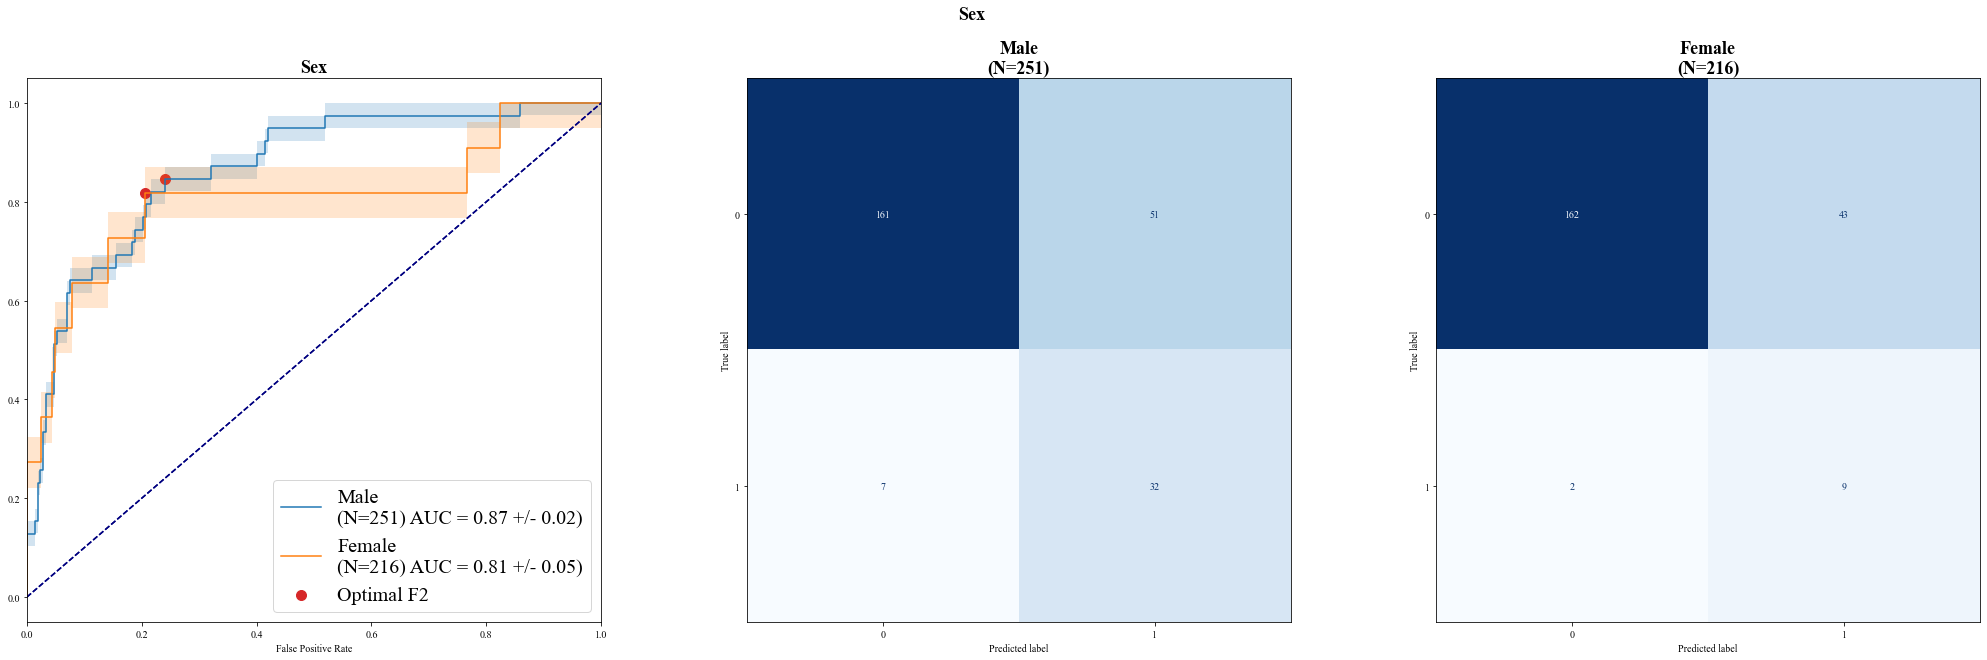

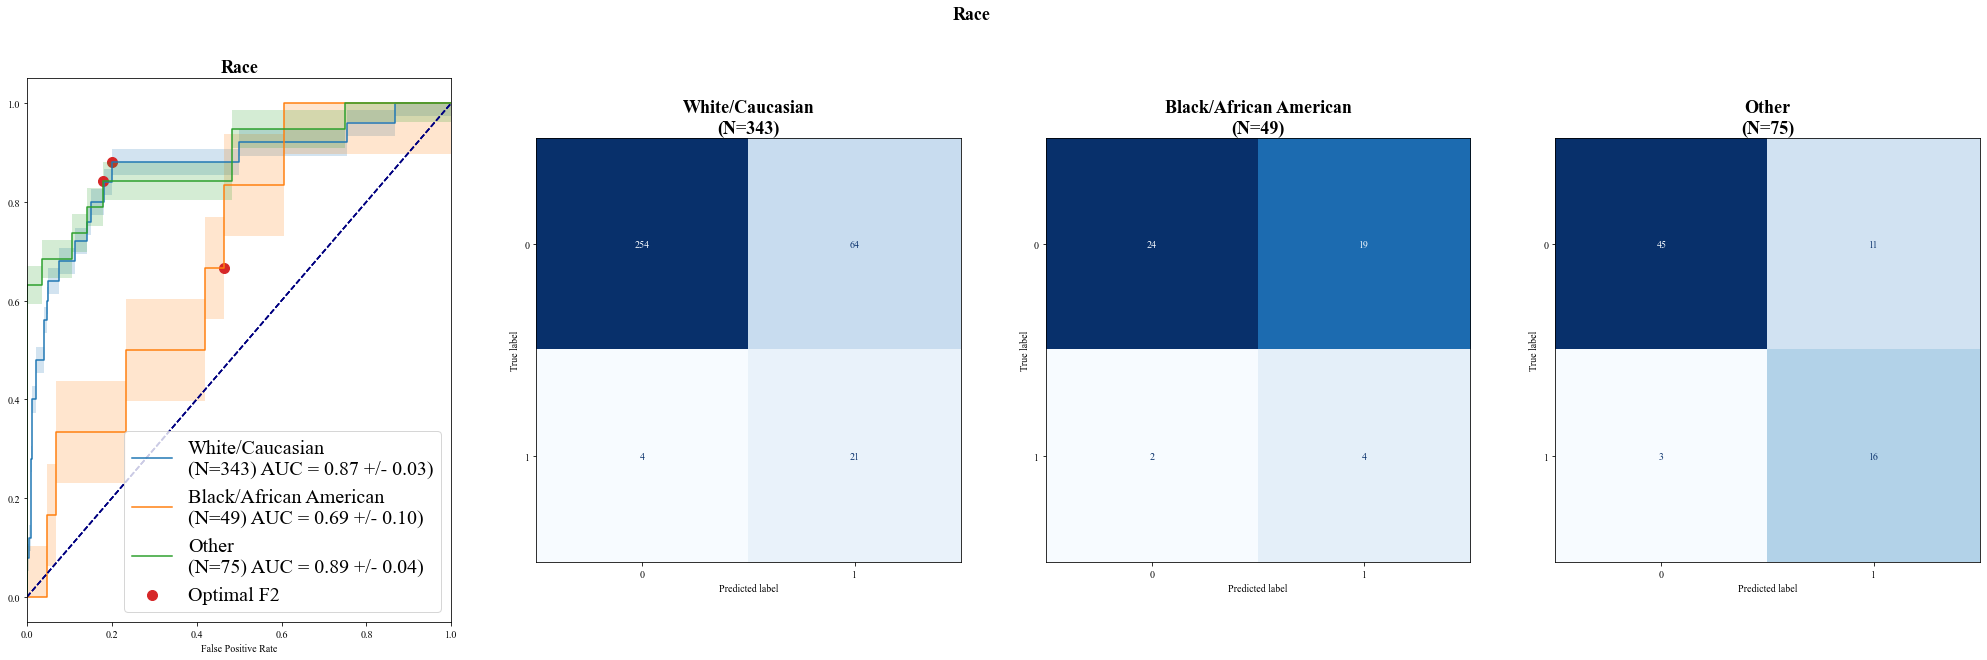

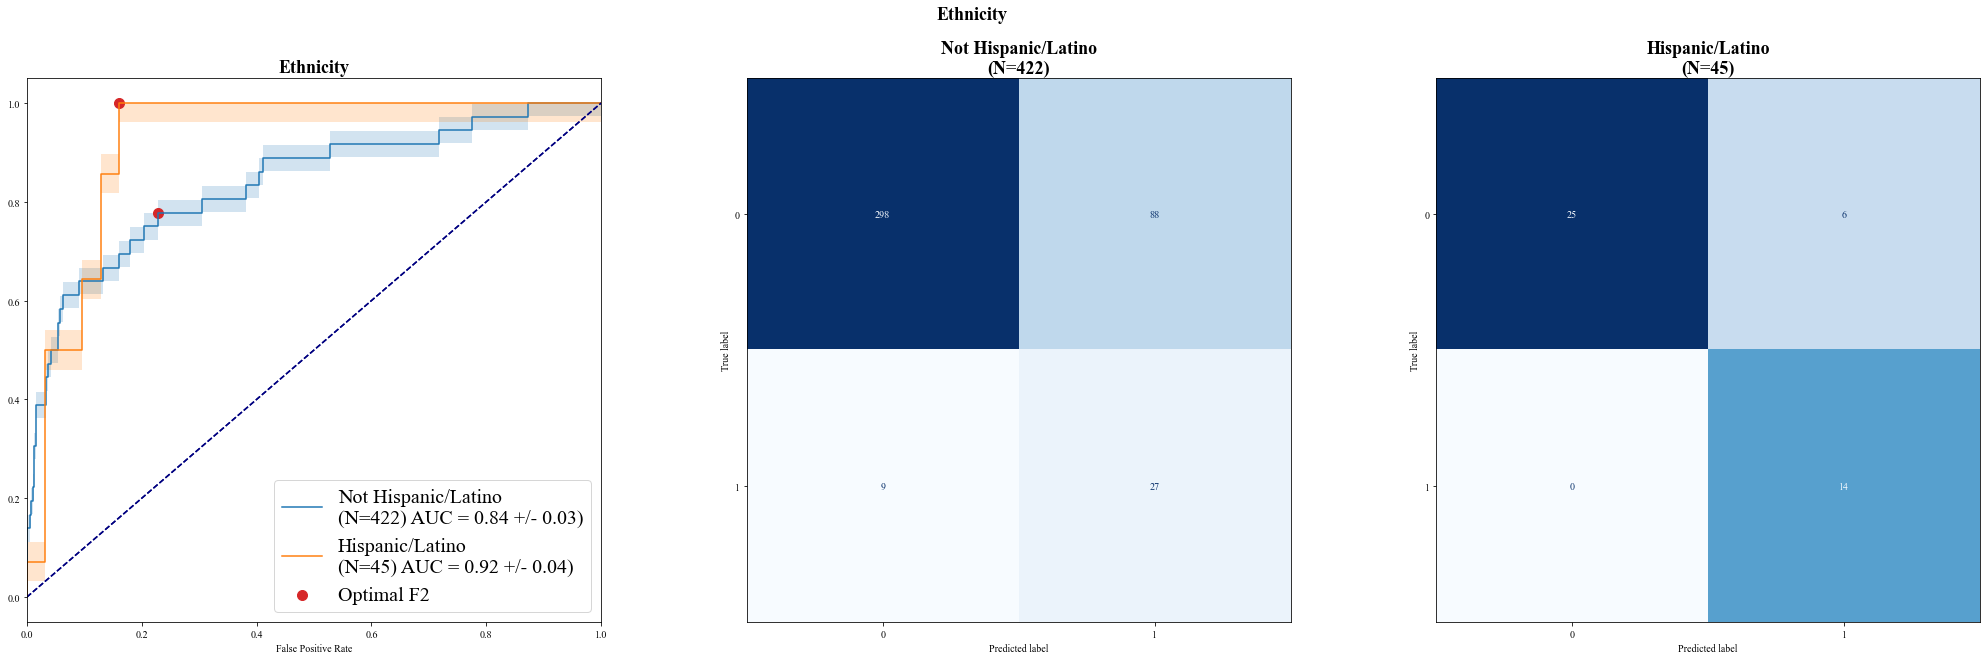

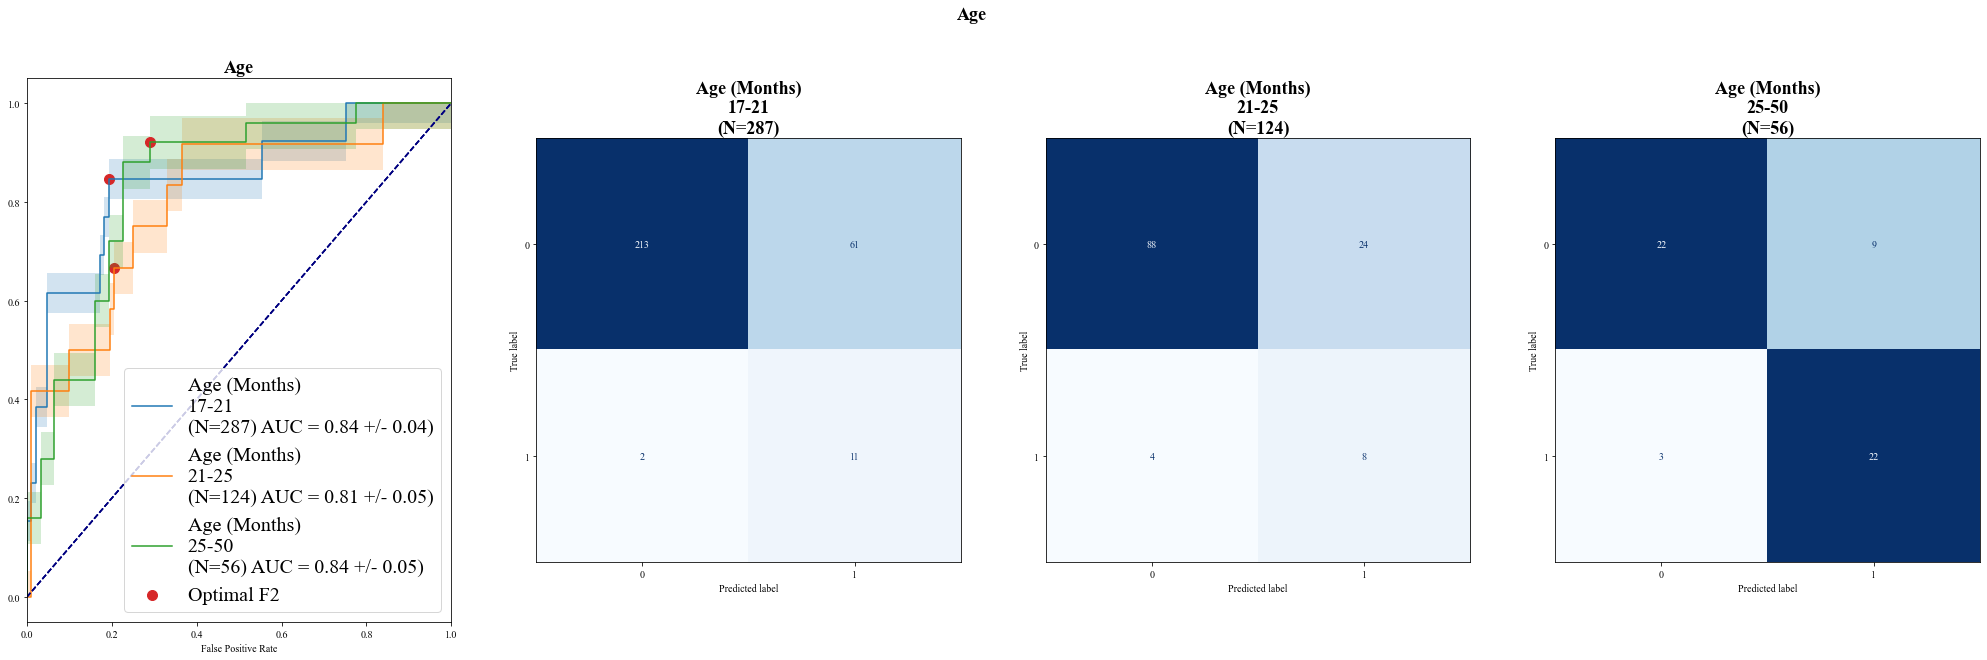

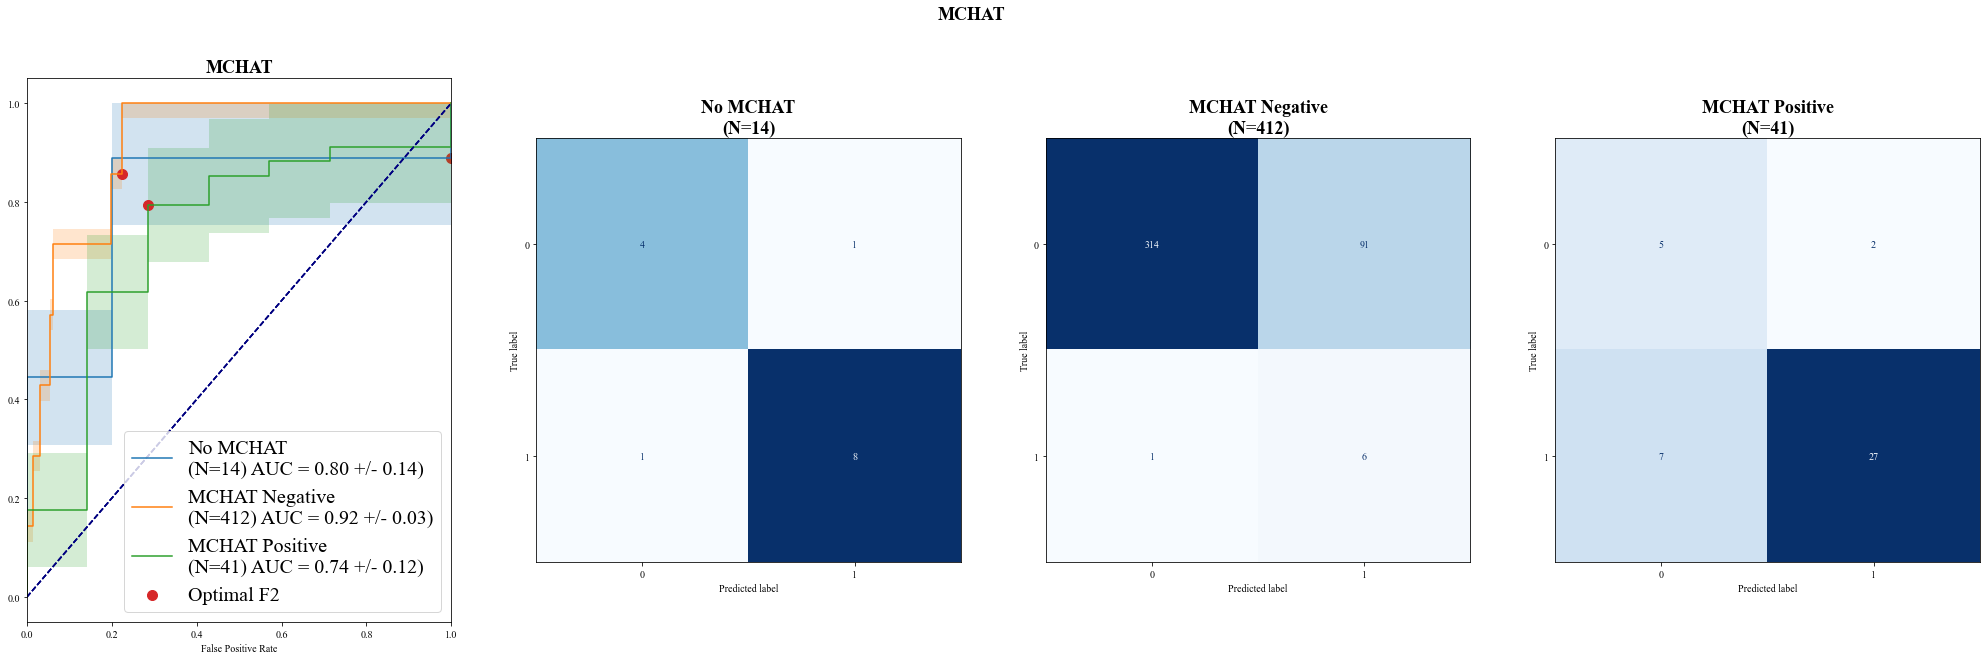

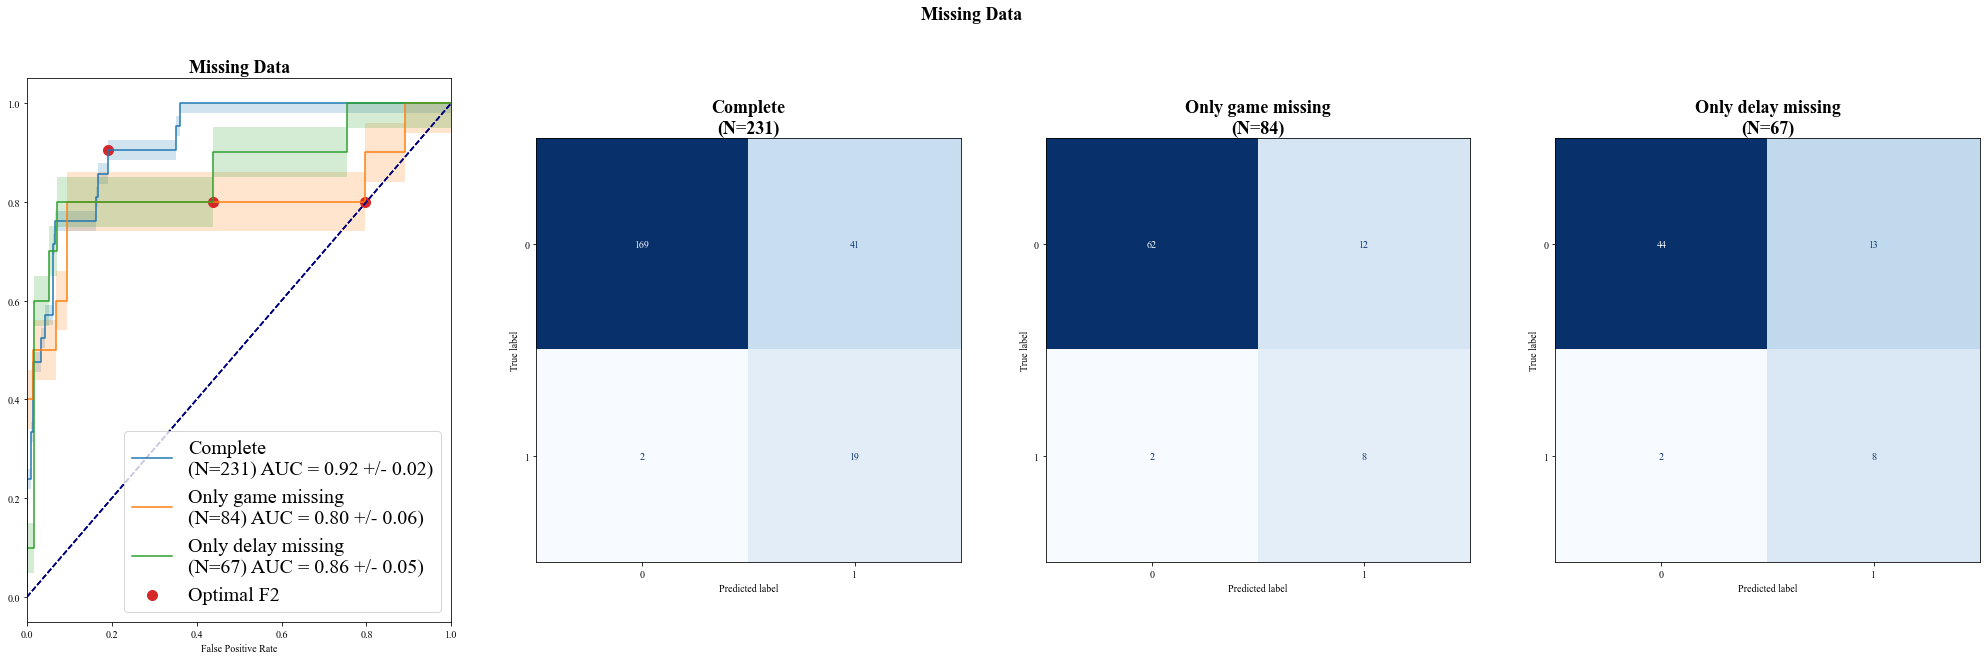

In [323]:
results_vertical['subgroup_raw'] = results_vertical['subgroup'].apply(lambda x: "\n".join(x.split('\n')[:-1]))

condition = 'subgroup_name'
for comparisons_name, comparisons in zip(['Sex', 'Race', 'Ethnicity', 'Age', 'MCHAT', 'Missing Data'],
                                         
                                         [['Male', 'Female'],
                                          ['White/Caucasian','Black/African American', 'Other'],
                                         ['Not Hispanic/Latino','Hispanic/Latino'], 
                                          ['Age (Months)\n17-21', 'Age (Months)\n21-25', 'Age (Months)\n25-50'],
                                          ['No MCHAT','MCHAT Negative', 'MCHAT Positive'],
                                         ['Complete', 'Only game missing','Only delay missing']] ):
    
    d = results_vertical[results_vertical['subgroup_raw'].isin(comparisons)]
        
    fig, axes = plt.subplots(1, len(comparisons)+1, figsize=(35, 10))
    fig.suptitle(comparisons_name, weight='bold', fontsize=18)
    for i, comp in enumerate(comparisons):
        row = d[d['subgroup_raw'] == comp].iloc[0]
        
        
        # ROC CURVE
        y_true = row['y_true']
        y_pred = row['y_pred']


        fpr, tpr, thresholds = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
        hanley_ci = compute_SD(roc_auc, np.sum(y_true==0), np.sum(y_true==1))

        axes[0].plot(fpr, tpr, '-', lw=1.5, label='{} AUC = {:.2f} +/- {:.2f})'.format(row['subgroup'], roc_auc, hanley_ci))
        axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
        axes[0].set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); axes[0].grid()
        axes[0].set_xlabel('False Positive Rate'); axes[0].set_ylabel('True Positive Rate')
        tprs_upper = np.minimum(tpr + hanley_ci, 1)
        tprs_lower = np.maximum(tpr - hanley_ci, 0)
        axes[0].fill_between(fpr, tprs_lower, tprs_upper,  alpha=.2)
        idx_threshold = np.argmin(np.abs(thresholds - exp.optimal_threshold))
        axes[0].scatter(fpr[idx_threshold], tpr[idx_threshold], color='tab:red', s=100, label="Optimal F2" if i==len(comparisons)-1 else None)
        
        axes[0].legend(loc='lower right', prop={'size':20})
        axes[0].set_title(comparisons_name, weight='bold', fontsize=18)
        
        
        # COnfusion matrix
        cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
        axes[i+1].set_title("{}".format(row['subgroup']), weight='bold', fontsize=18)

Text(0, 0.5, 'True Positive Rate')

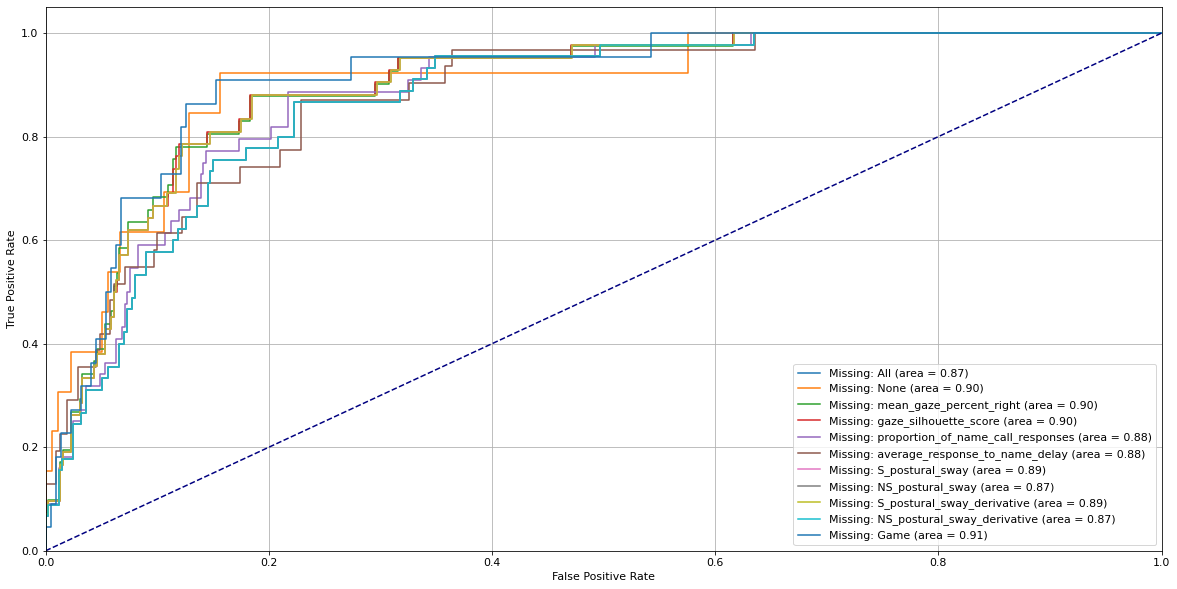

In [240]:
fig, ax =  plt.subplots(1, 1, figsize=(20, 10))


for missing, variables in grouped_missing_features.items():
    
    d=dataframe.dropna(subset=variables, how='any') 

    
    title = missing
    y_true = d['y_true'].to_numpy()
    y_pred = d['y_pred'].to_numpy()
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, '-', lw=1.5, label='Missing: {} (area = {:.2f})'.format(missing, roc_auc))


ax.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
ax.legend()
ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); ax.grid()
ax.set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')

In [243]:
results

,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TP_normalized,FN,FN_normalized,TN,TN_normalized,FP,FP_normalized,N
All,0.873,0.430,0.872,0.187,0.967,0.482,0.217,0.841,0.443,0.756,0.850,0.354,0.970,0.244,0.646,0.030,34,7.000000,11,2.000000,351,77.000000,62,14.000000,458
All,0.873,0.430,0.872,0.187,0.967,0.482,0.217,0.841,0.443,0.756,0.850,0.354,0.970,0.244,0.646,0.030,34,0.074236,11,0.024017,351,0.766376,62,0.135371,458
None,0.899,0.503,0.970,0.327,0.990,0.485,0.344,0.865,0.463,0.846,0.866,0.314,0.987,0.154,0.686,0.013,11,0.057292,2,0.010417,155,0.807292,24,0.125000,192
mean_gaze_percent_right,0.896,0.477,0.891,0.218,0.973,0.542,0.264,0.871,0.501,0.780,0.880,0.405,0.975,0.220,0.595,0.025,32,0.073733,9,0.020737,346,0.797235,47,0.108295,434
gaze_silhouette_score,0.895,0.476,0.886,0.214,0.972,0.541,0.259,0.871,0.508,0.786,0.880,0.412,0.975,0.214,0.588,0.025,33,0.075862,9,0.020690,346,0.795402,47,0.108046,435
proportion_of_name_call_responses,0.881,0.442,0.876,0.194,0.968,0.500,0.229,0.848,0.461,0.773,0.856,0.366,0.972,0.227,0.634,0.028,34,0.074890,10,0.022026,351,0.773128,59,0.129956,454
average_response_to_name_delay,0.877,0.478,0.932,0.257,0.984,0.486,0.274,0.848,0.418,0.710,0.861,0.338,0.967,0.290,0.662,0.033,22,0.064516,9,0.026393,267,0.782991,43,0.126100,341
S_postural_sway,0.895,0.475,0.886,0.213,0.972,0.537,0.259,0.869,0.504,0.786,0.878,0.407,0.975,0.214,0.593,0.025,33,0.075688,9,0.020642,346,0.793578,48,0.110092,436
NS_postural_sway,0.873,0.430,0.872,0.187,0.967,0.482,0.217,0.841,0.443,0.756,0.850,0.354,0.970,0.244,0.646,0.030,34,0.074236,11,0.024017,351,0.766376,62,0.135371,458
S_postural_sway_derivative,0.895,0.475,0.886,0.213,0.972,0.537,0.259,0.869,0.504,0.786,0.878,0.407,0.975,0.214,0.593,0.025,33,0.075688,9,0.020642,346,0.793578,48,0.110092,436
